# 탐색적 데이터 분석(EDA)

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 필요한 패키지 설치

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes=True)
%matplotlib inline

In [4]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
df = pd.read_csv("./datasets/hotel_bookings.csv")

# 데이터 셈플 확인
df.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  

[3 rows x 32 columns]

In [5]:
df2 = df[['hotel', 'lead_time']]
df2.head(2)

hotel  lead_time
0  Resort Hotel        342
1  Resort Hotel        737

In [6]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# 각 컬럼의 통계치 확인
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [167]:
# 각 컬럼의 왜도 확인
df.skew(numeric_only=True)

quiz          0.387444
final_test    0.319285
sleep_time   -0.400289
dtype: float64

In [107]:
# 특정 변수 분포 시각화
plt.rcParams['figure.dpi'] = 300
sns.distplot(df['lead_time'])

KeyError: 'lead_time'

<Axes: xlabel='hotel', ylabel='lead_time'>

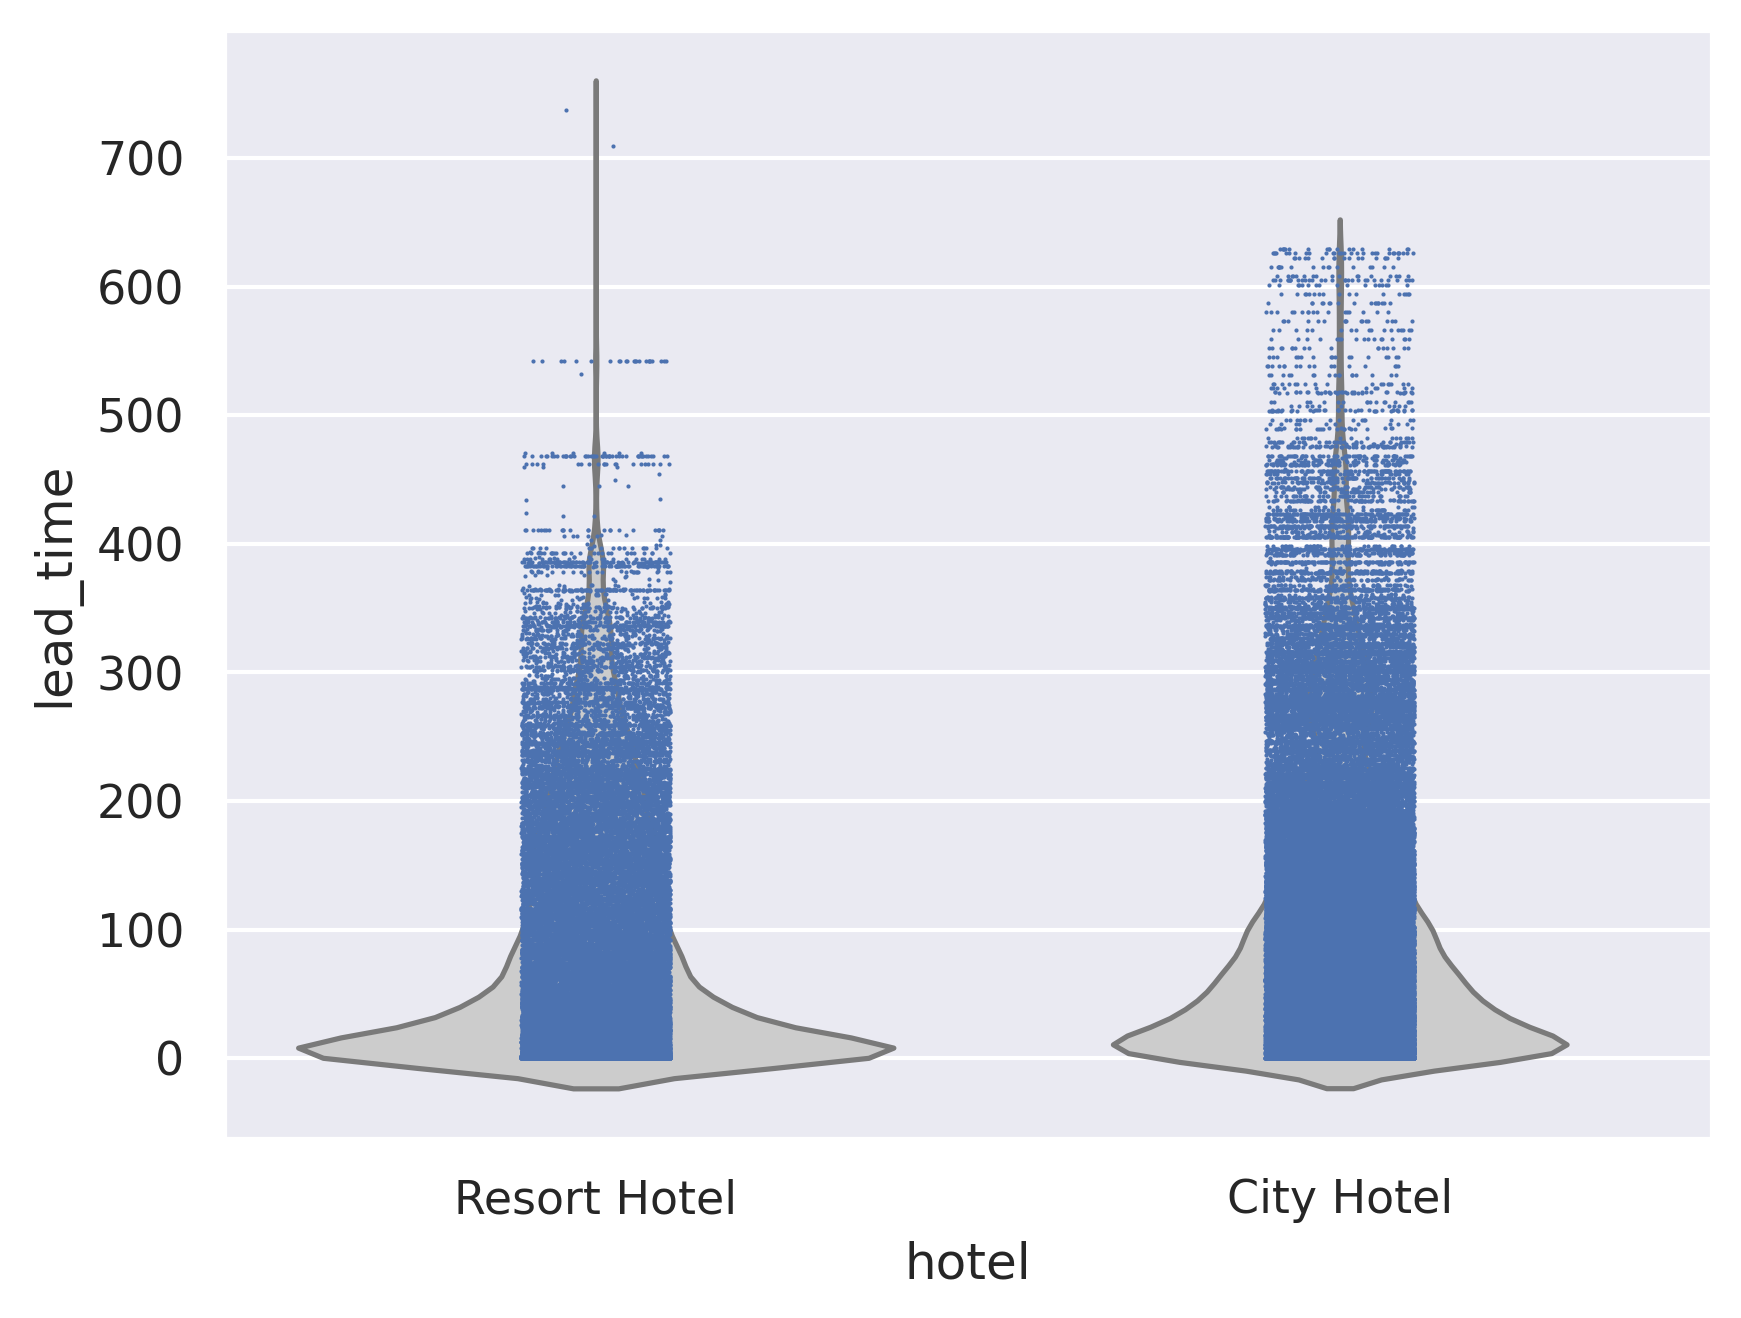

In [10]:
# 호텔 구분에 따른 lead_time 분포 차이 시각화
sns.violinplot(x="hotel", y="lead_time", data=df, inner=None, color=".8")
sns.stripplot(x="hotel", y="lead_time", data=df, size=1)

# 공분산과 상관성 분석

In [108]:
# 필요한 패키지 설치

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.dpi'] = 100

In [109]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/deepakkumar1987/correlation
df = pd.read_csv("datasets/wine-quality.csv")

# 데이터 샘플 확인
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

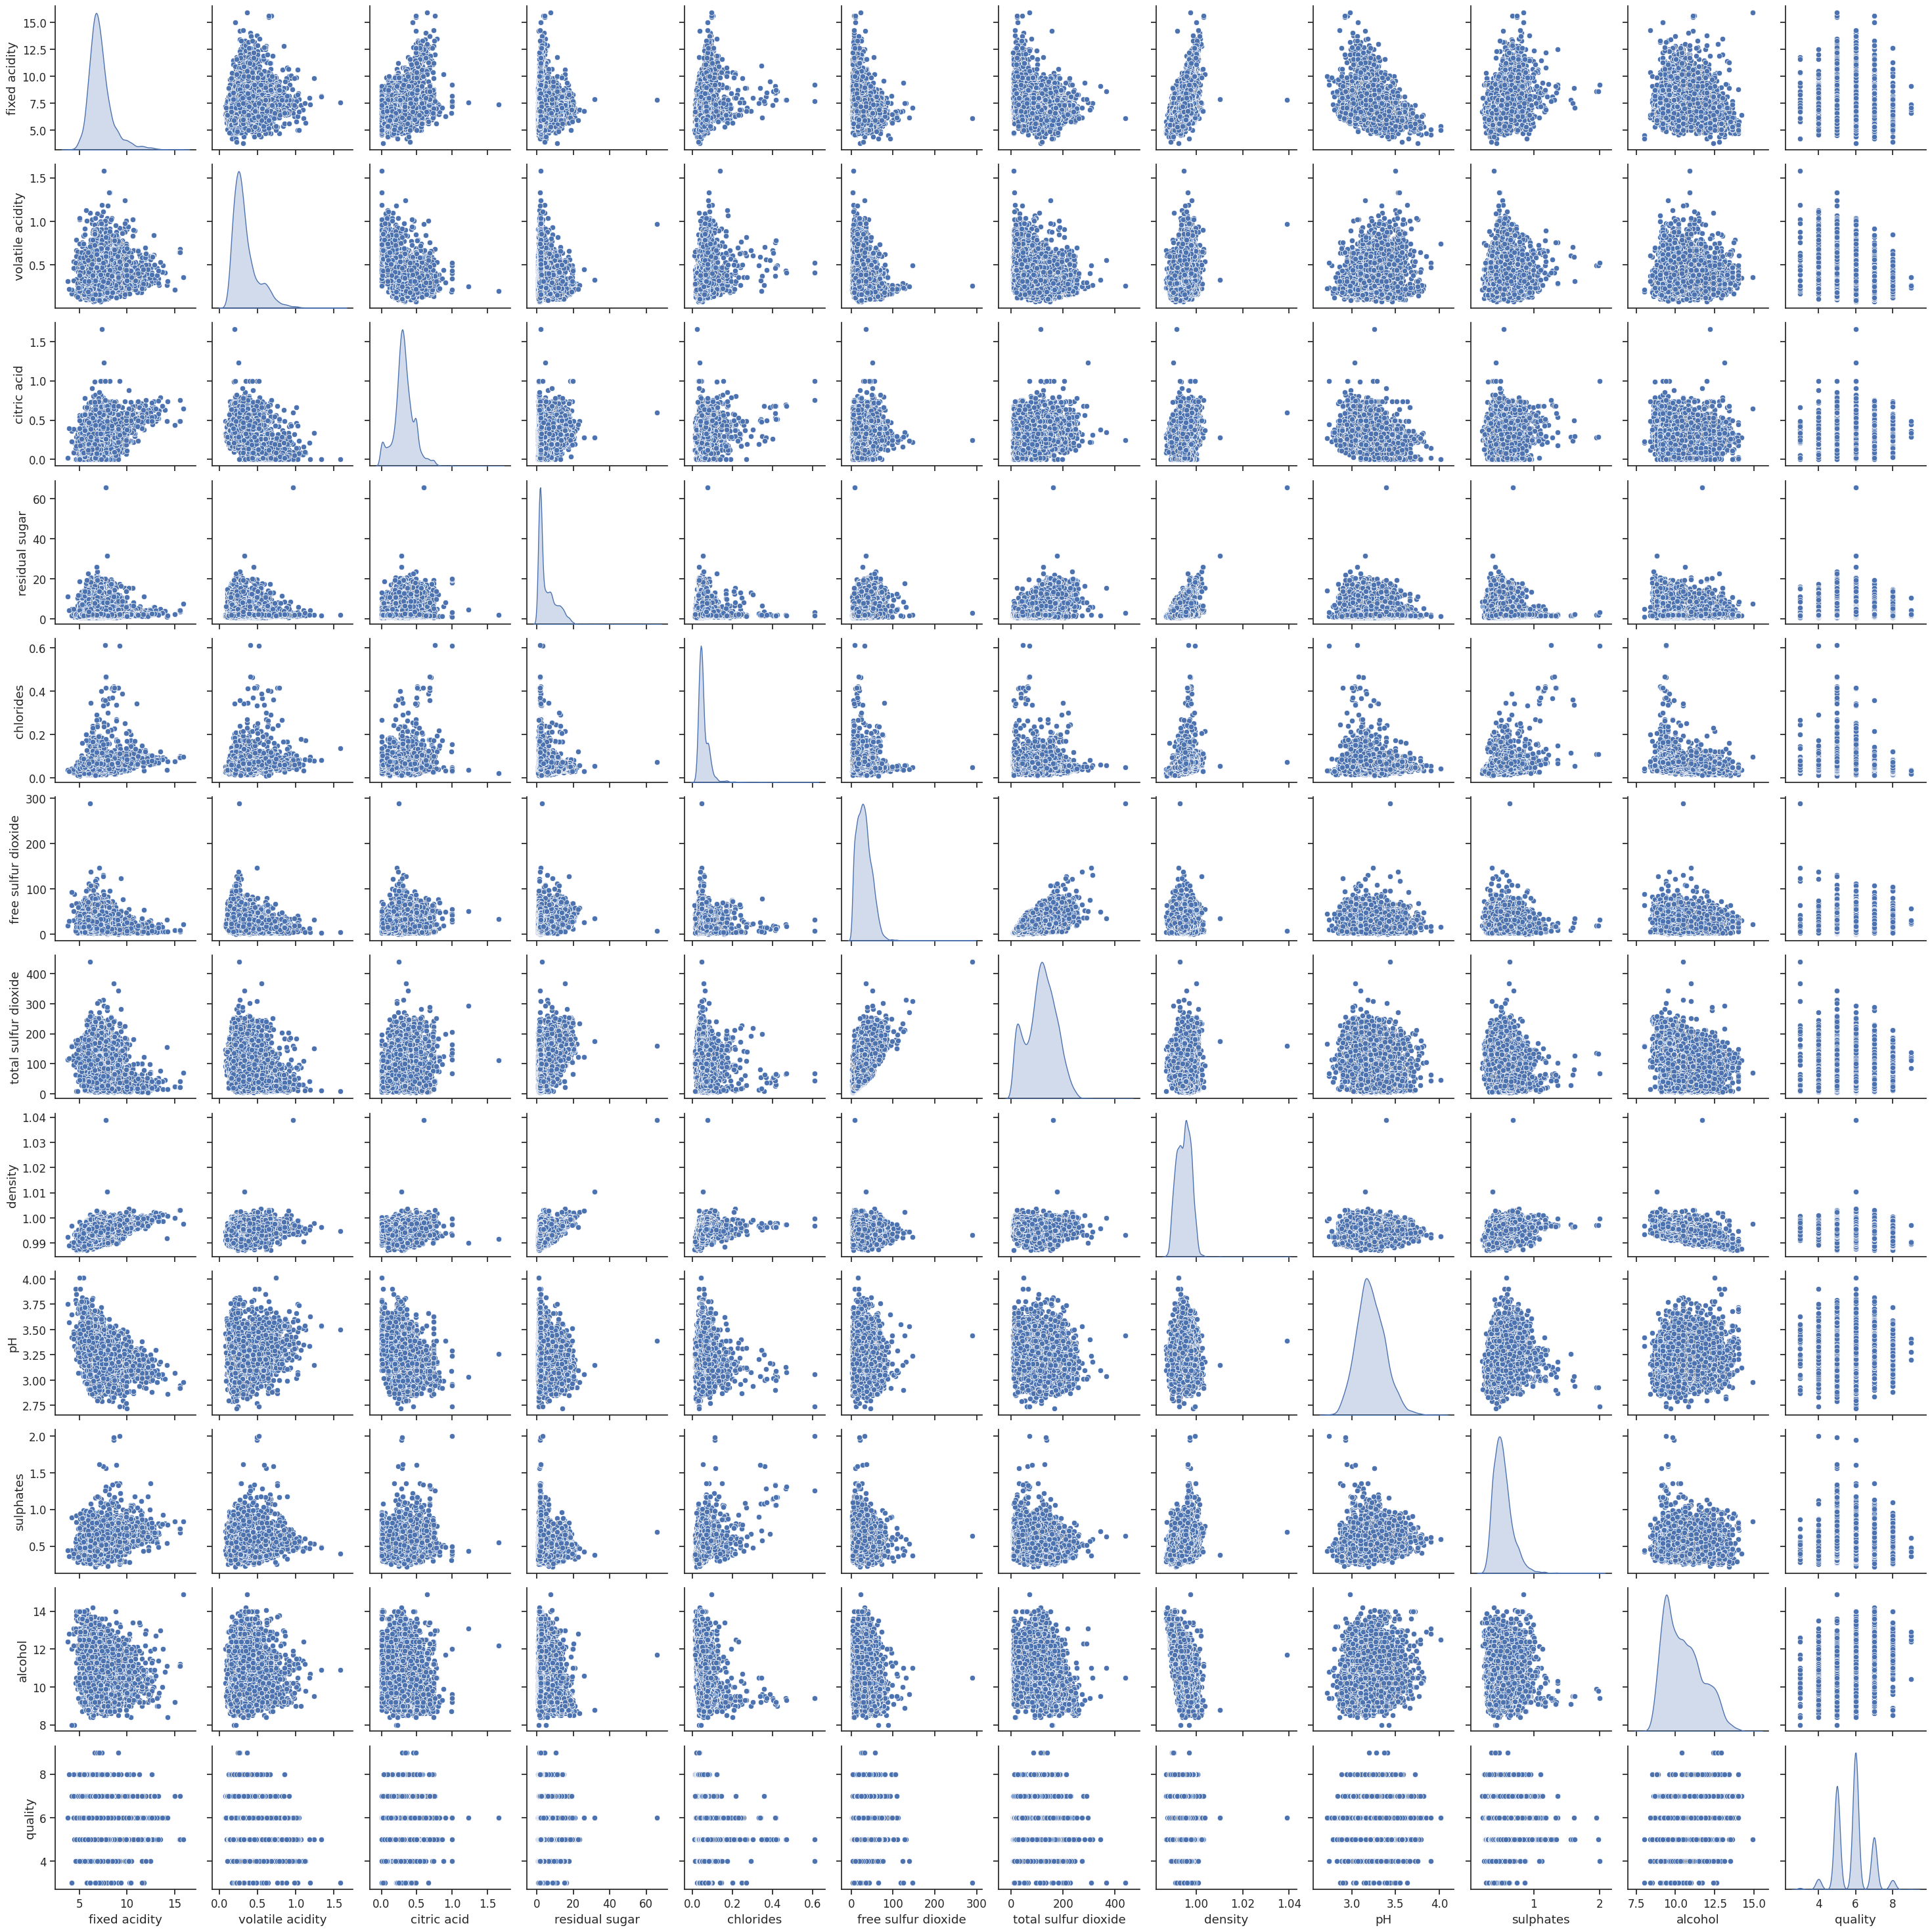

In [110]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1) ## 폰트 크기 설정
sns.set_style('ticks') ## 축 눈금 설정
sns.pairplot(df,
             diag_kind='kde' # 상관계수가 1이면 분포로 표시
            )
plt.show()

In [26]:
# 공분산 확인
df.cov(numeric_only=True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.681560          0.047012     0.060971   
volatile acidity           0.047012          0.027109    -0.009043   
citric acid                0.060971         -0.009043     0.021102   
residual sugar            -0.693045         -0.154122     0.098498   
chlorides                  0.013564          0.002177     0.000200   
free sulfur dioxide       -6.524162         -1.032411     0.344101   
total sulfur dioxide     -24.162531         -3.861743     1.602662   
density                    0.001786          0.000134     0.000042   
pH                        -0.052524          0.006898    -0.007675   
sulphates                  0.057990          0.005526     0.001245   
alcohol                   -0.147911         -0.007509    -0.001808   
quality                   -0.087224         -0.038246     0.010874   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.693045   0.013564            -6.524162   
volatile acidity           -0.154122   0.002177            -1.032411   
citric acid                 0.098498   0.000200             0.344101   
residual sugar             22.639751  -0.021493            34.060547   
chlorides                  -0.021493   0.001228            -0.121269   
free sulfur dioxide        34.060547  -0.121269           315.041192   
total sulfur dioxide      133.334227  -0.553673           723.261972   
density                     0.007884   0.000038             0.001369   
pH                         -0.204174   0.000252            -0.414329   
sulphates                  -0.131562   0.002061            -0.497973   
alcohol                    -2.041388  -0.010735            -3.807165   
quality                    -0.153011  -0.006145             0.859664   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                   -24.162531  0.001786 -0.052524   0.057990   
volatile acidity                 -3.861743  0.000134  0.006898   0.005526   
citric acid                       1.602662  0.000042 -0.007675   0.001245   
residual sugar                  133.334227  0.007884 -0.204174  -0.131562   
chlorides                        -0.553673  0.000038  0.000252   0.002061   
free sulfur dioxide             723.261972  0.001369 -0.414329  -0.497973   
total sulfur dioxide           3194.720039  0.005491 -2.159577  -2.316258   
density                           0.005491  0.000009  0.000006   0.000116   
pH                               -2.159577  0.000006  0.025840   0.004575   
sulphates                        -2.316258  0.000116  0.004575   0.022146   
alcohol                         -17.914646 -0.002456  0.023203  -0.000579   
quality                          -2.042704 -0.000801  0.002719   0.005032   

                        alcohol   quality  
fixed acidity         -0.147911 -0.087224  
volatile acidity      -0.007509 -0.038246  
citric acid           -0.001808  0.010874  
residual sugar        -2.041388 -0.153011  
chlorides             -0.010735 -0.006145  
free sulfur dioxide   -3.807165  0.859664  
total sulfur dioxide -17.914646 -2.042704  
density               -0.002456 -0.000801  
pH                     0.023203  0.002719  
sulphates             -0.000579  0.005032  
alcohol                1.422561  0.462776  
quality                0.462776  0.762575

In [28]:
# 피어슨 상관계수 확인
df.corr(method='pearson', numeric_only=True)

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.220172     0.323736   
volatile acidity           0.220172          1.000000    -0.378061   
citric acid                0.323736         -0.378061     1.000000   
residual sugar            -0.112319         -0.196702     0.142486   
chlorides                  0.298421          0.377167     0.039315   
free sulfur dioxide       -0.283317         -0.353230     0.133437   
total sulfur dioxide      -0.329747         -0.414928     0.195218   
density                    0.459204          0.271193     0.096320   
pH                        -0.251814          0.260660    -0.328689   
sulphates                  0.300380          0.225476     0.057613   
alcohol                   -0.095603         -0.038248    -0.010433   
quality                   -0.077031         -0.265953     0.085706   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.112319   0.298421            -0.283317   
volatile acidity           -0.196702   0.377167            -0.353230   
citric acid                 0.142486   0.039315             0.133437   
residual sugar              1.000000  -0.128902             0.403439   
chlorides                  -0.128902   1.000000            -0.195042   
free sulfur dioxide         0.403439  -0.195042             1.000000   
total sulfur dioxide        0.495820  -0.279580             0.720934   
density                     0.552498   0.362594             0.025717   
pH                         -0.267050   0.044806            -0.145191   
sulphates                  -0.185745   0.395332            -0.188489   
alcohol                    -0.359706  -0.256861            -0.179838   
quality                    -0.036825  -0.200886             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329747  0.459204 -0.251814   0.300380   
volatile acidity                 -0.414928  0.271193  0.260660   0.225476   
citric acid                       0.195218  0.096320 -0.328689   0.057613   
residual sugar                    0.495820  0.552498 -0.267050  -0.185745   
chlorides                        -0.279580  0.362594  0.044806   0.395332   
free sulfur dioxide               0.720934  0.025717 -0.145191  -0.188489   
total sulfur dioxide              1.000000  0.032395 -0.237687  -0.275381   
density                           0.032395  1.000000  0.011920   0.259454   
pH                               -0.237687  0.011920  1.000000   0.191248   
sulphates                        -0.275381  0.259454  0.191248   1.000000   
alcohol                          -0.265740 -0.686745  0.121002  -0.003261   
quality                          -0.041385 -0.305858  0.019366   0.038729   

                       alcohol   quality  
fixed acidity        -0.095603 -0.077031  
volatile acidity     -0.038248 -0.265953  
citric acid          -0.010433  0.085706  
residual sugar       -0.359706 -0.036825  
chlorides            -0.256861 -0.200886  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121002  0.019366  
sulphates            -0.003261  0.038729  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

<Axes: >

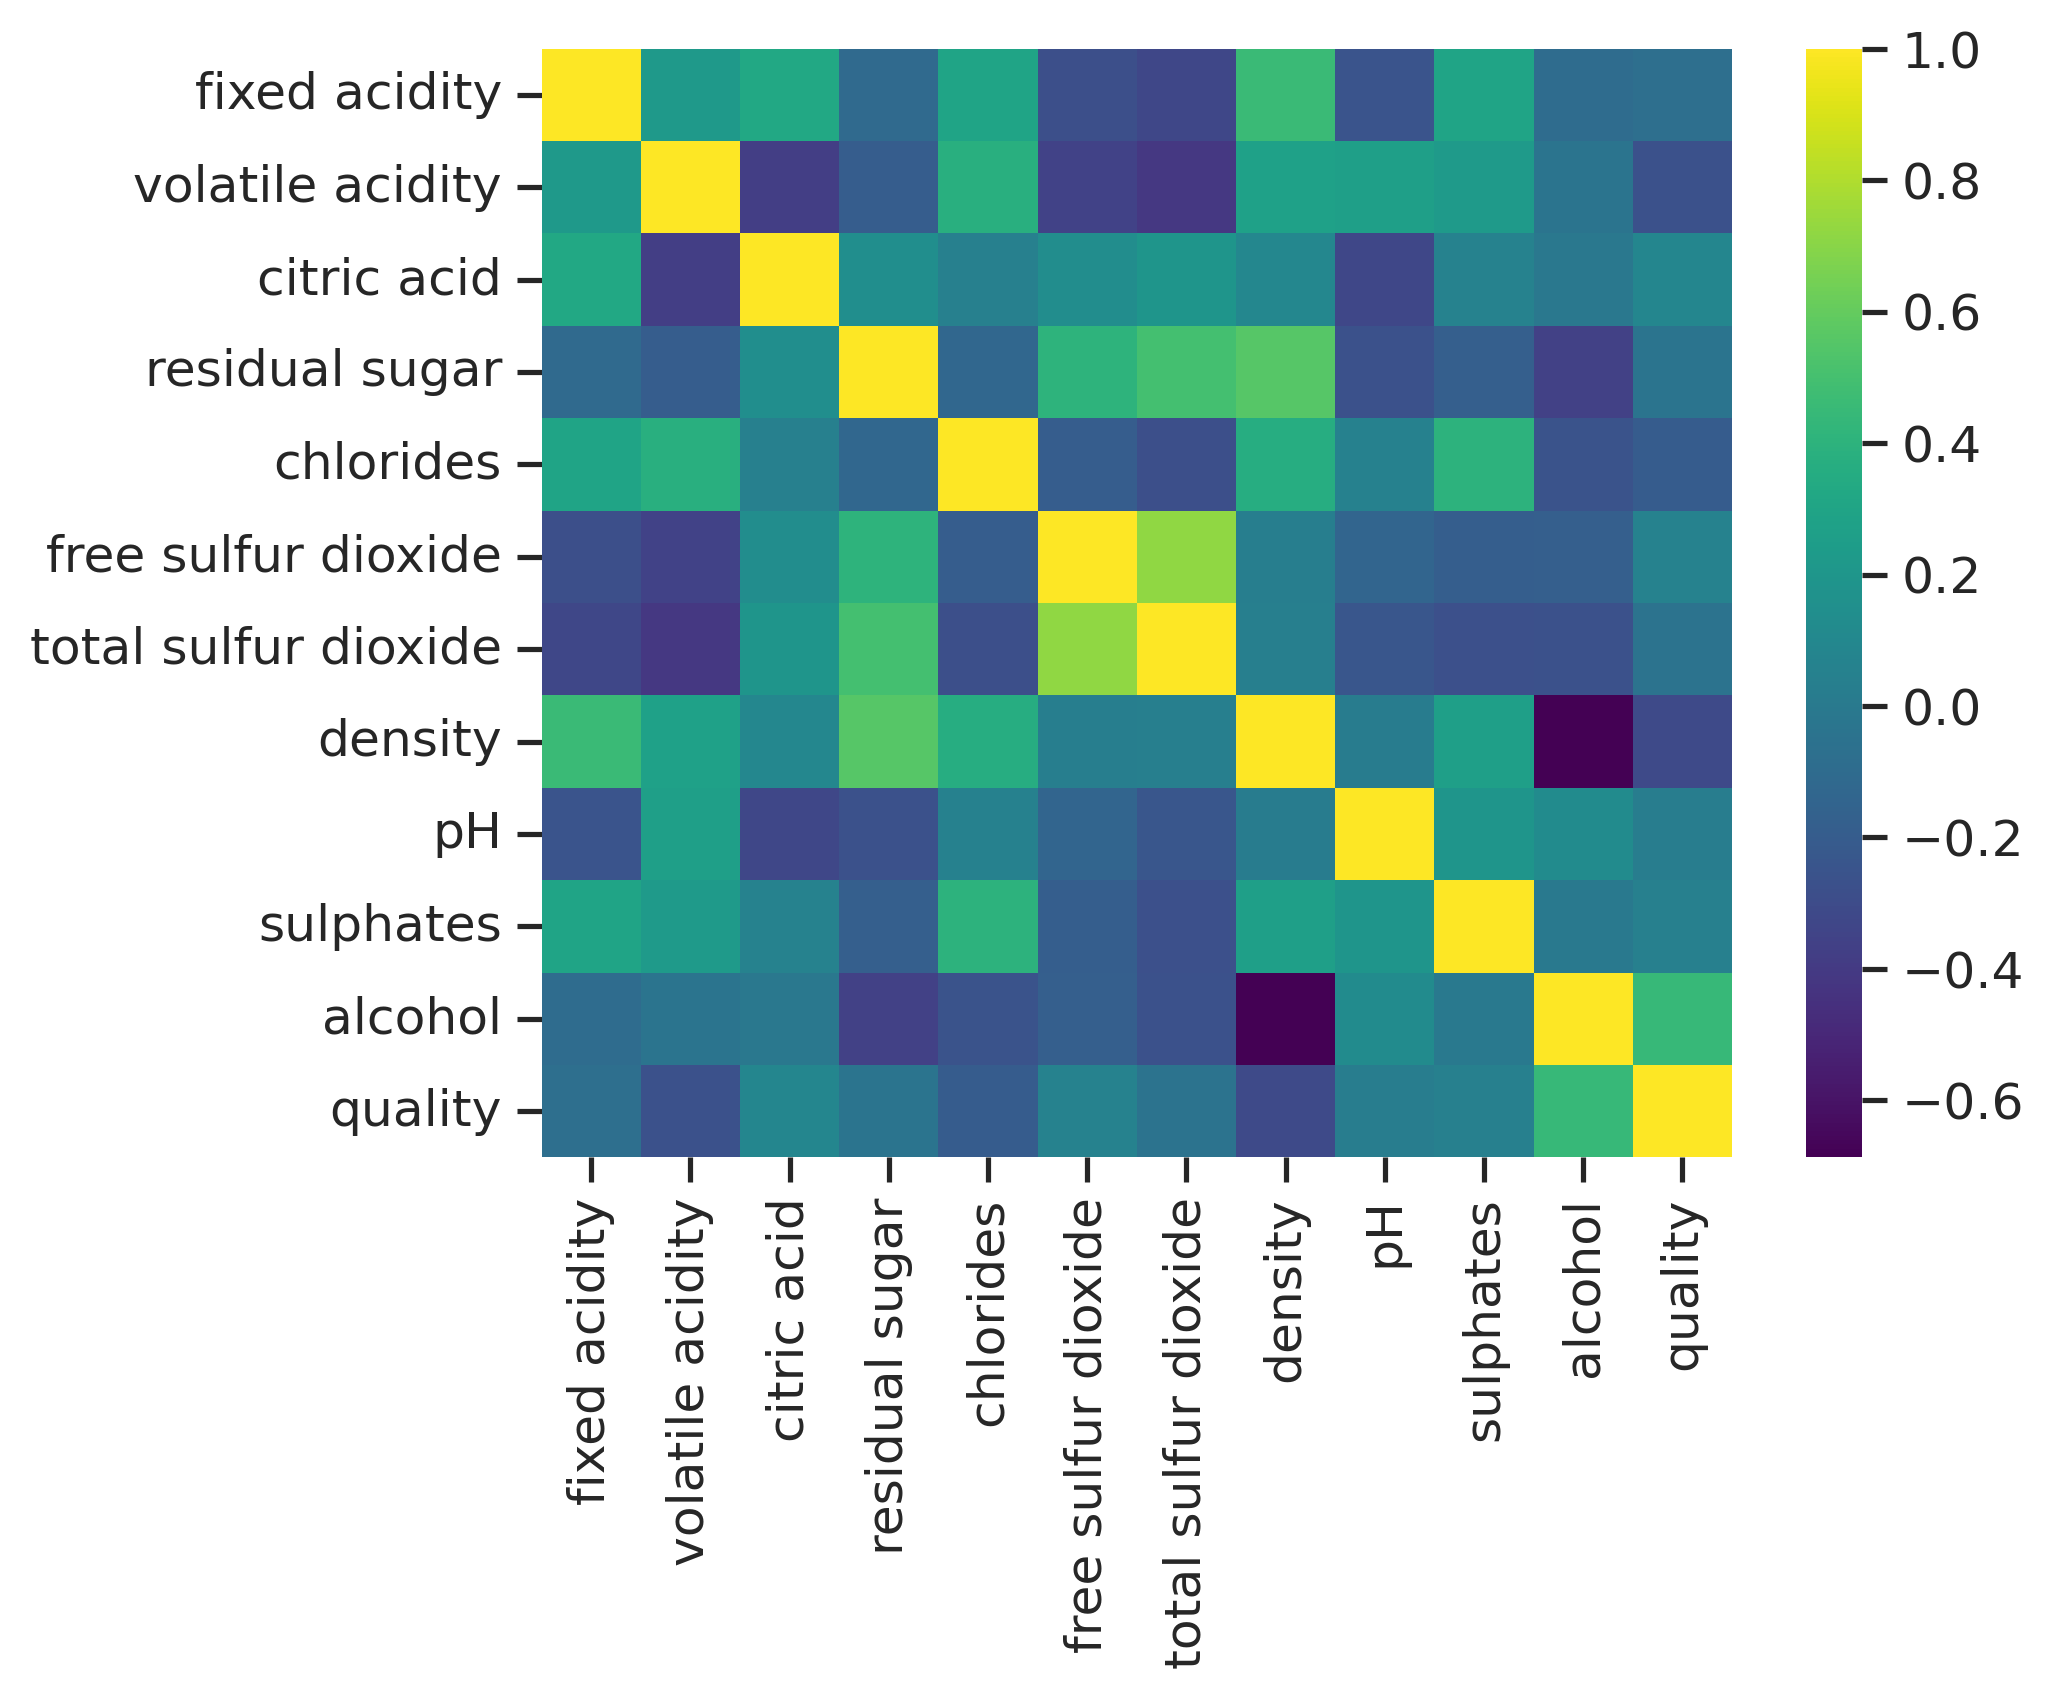

In [30]:
# 히트맵 시각화
sns.heatmap(df.corr(numeric_only=True), cmap='viridis')

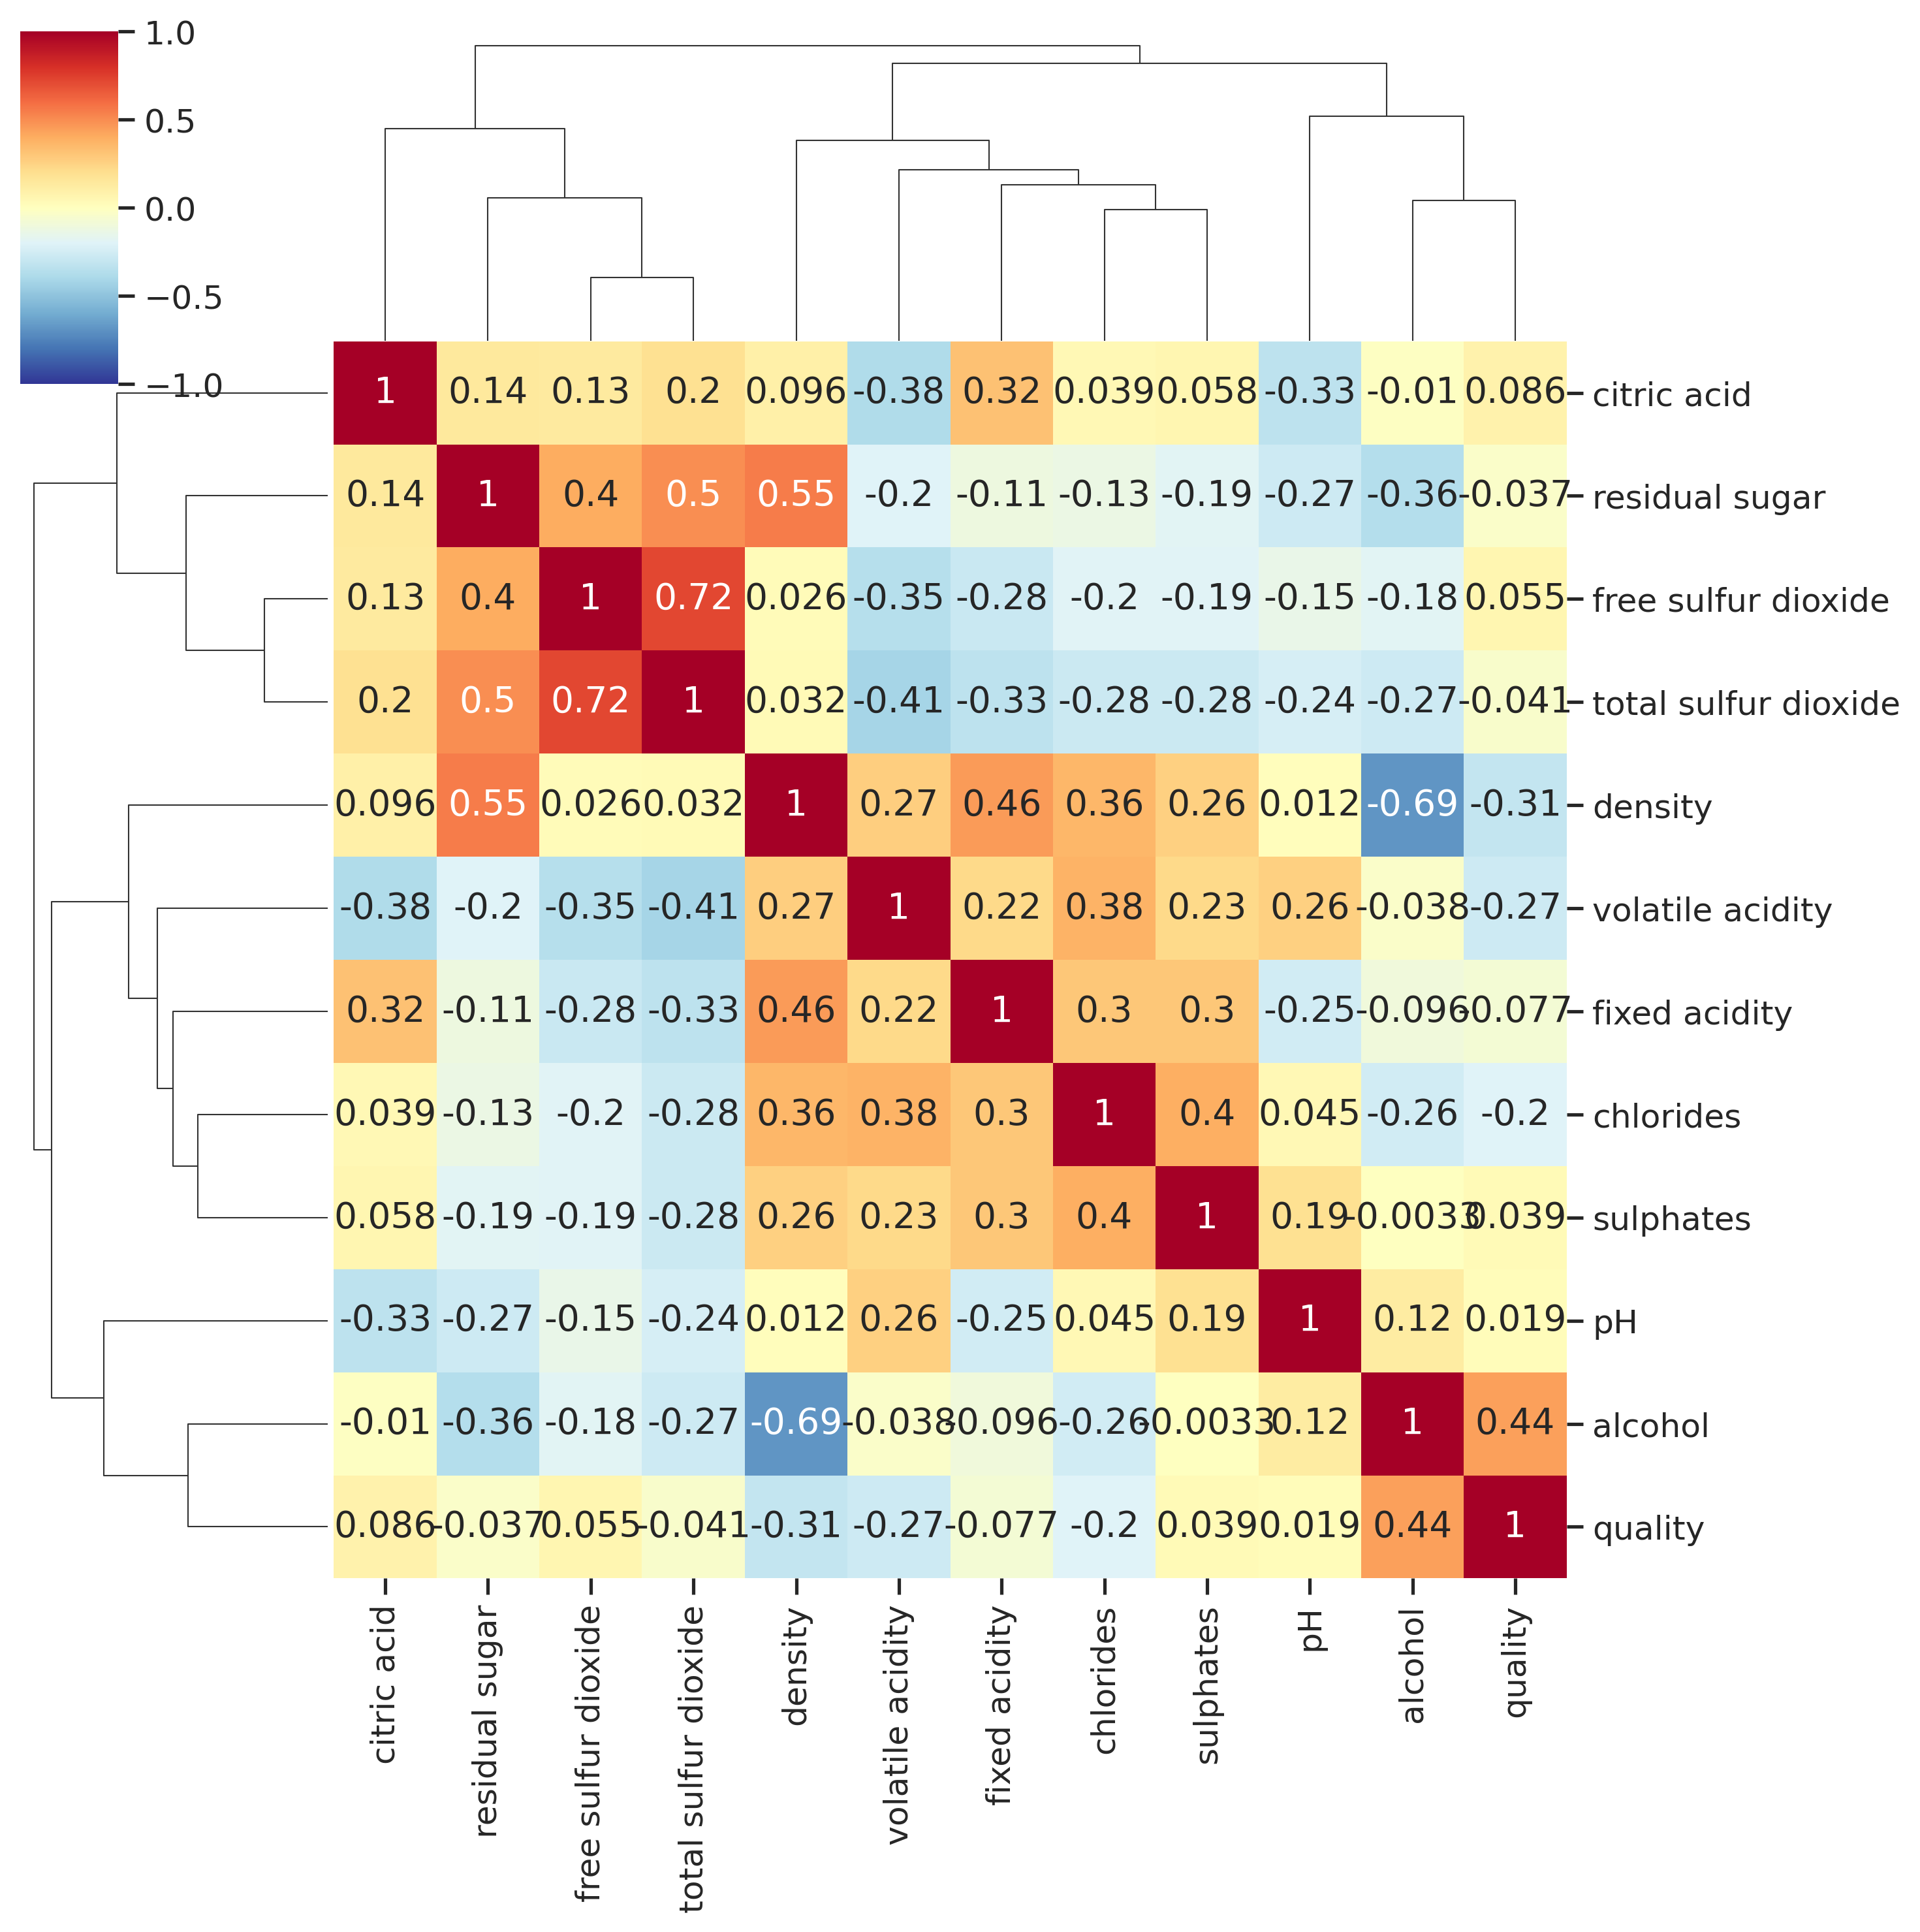

In [31]:
# clustermap 히트맵 시각화
sns.clustermap(df.corr(numeric_only=True), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

Text(0.5, 1.0, 'Wine Quality Correlation')

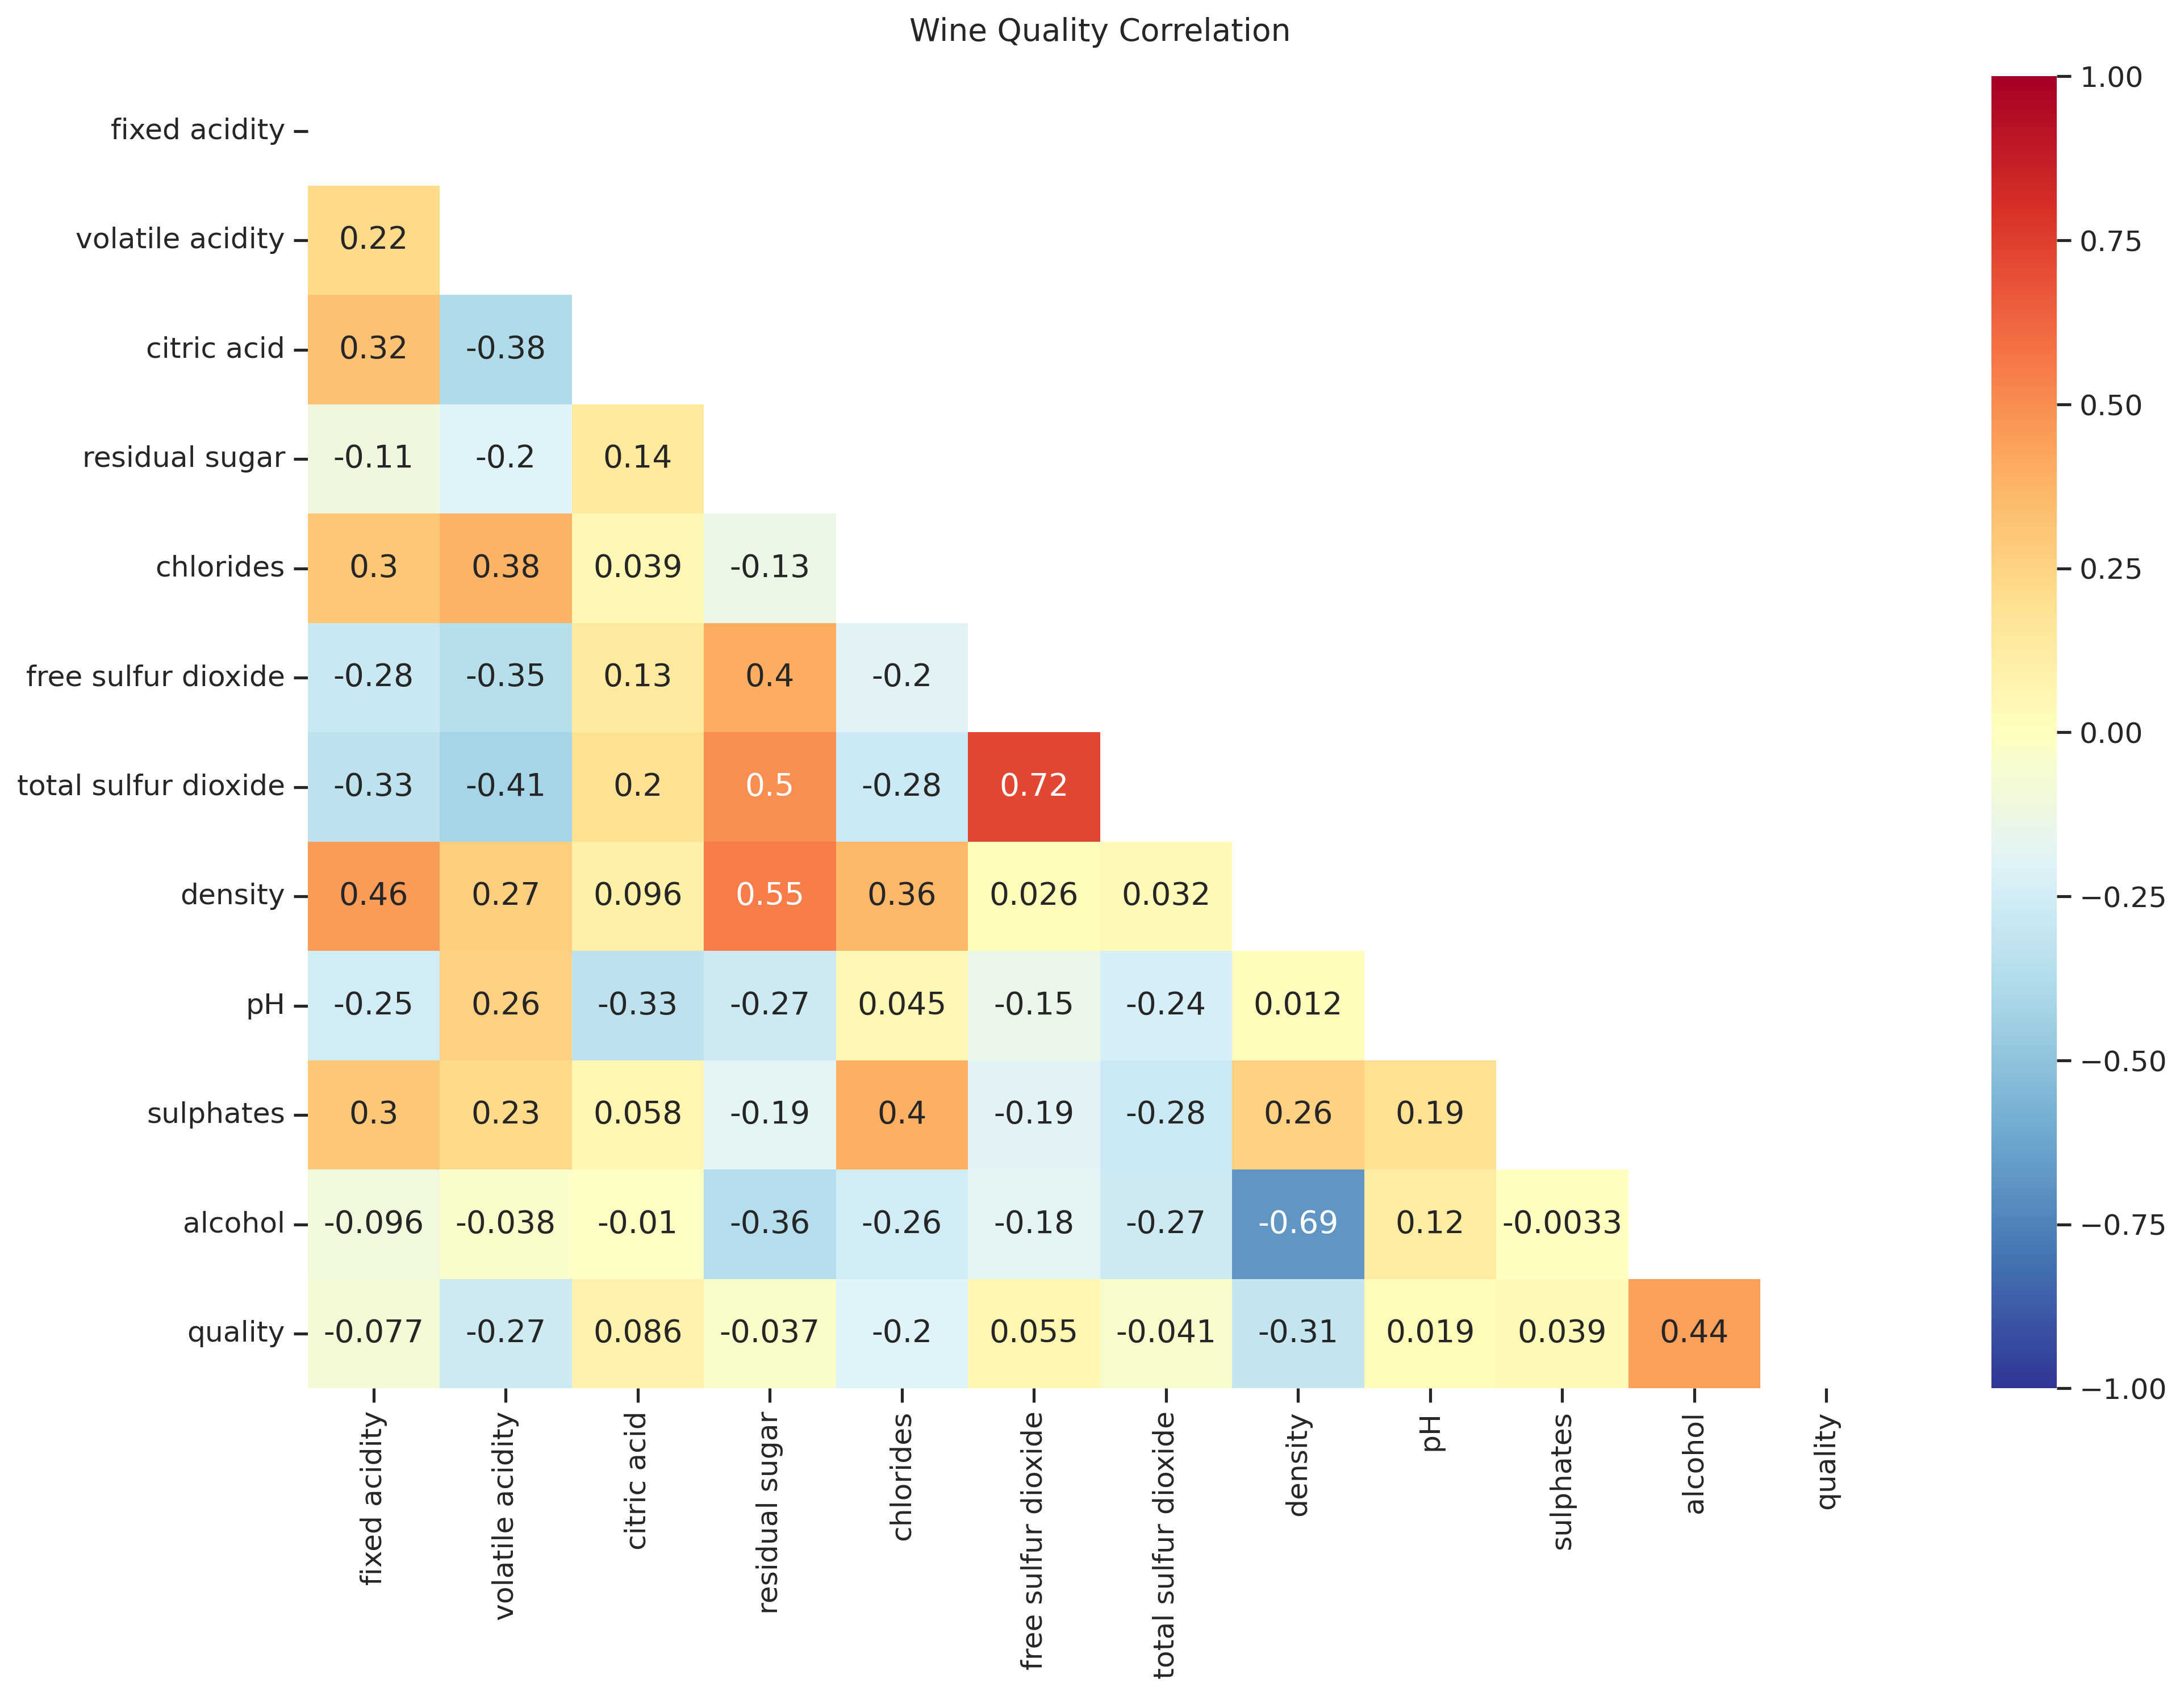

In [34]:
# 중복 제거 히트맵 시각화

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(df.corr(numeric_only=True)))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=np.bool_))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)

# 시간 시각화

In [35]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 300

In [37]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
df = pd.read_csv("datasets/superstore.csv")

# 데이터 샘플 확인
df.head(2)

Row ID        Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017  Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017  Second Class    CG-12520   

  Customer Name   Segment        Country       City     State  Postal Code  \
0   Claire Gute  Consumer  United States  Henderson  Kentucky      42420.0   
1   Claire Gute  Consumer  United States  Henderson  Kentucky      42420.0   

  Region       Product ID   Category Sub-Category  \
0  South  FUR-BO-10001798  Furniture    Bookcases   
1  South  FUR-CH-10000454  Furniture       Chairs   

                                        Product Name   Sales  
0                  Bush Somerset Collection Bookcase  261.96  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94

In [46]:
df['Date2']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y", infer_datetime_format=True) 


/tmp/ipykernel_1925/1255563796.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date2']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y", infer_datetime_format=True)


In [49]:
# date 컬럼 날짜형식 변환
df['Date2']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y", infer_datetime_format=True) 
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

## 선 그래프 용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018]

# 2018년 일 별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

/tmp/ipykernel_1925/3825801844.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date2']= pd.to_datetime(df['Order Date'], format="%d/%m/%Y", infer_datetime_format=True)


Date2     Sales
0 2018-01-01  1481.828
1 2018-01-02  2079.554
2 2018-01-03  2070.272
3 2018-01-06    33.740
4 2018-01-07  3395.590

In [52]:
pd.date_range("2020-01-01", "2023-12-31", freq='ME')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [55]:
df['Date2'].apply(lambda x : x.weekday())

7980    5
741     6
740     6
739     6
1759    0
       ..
907     6
1297    6
906     6
645     6
5091    6
Name: Date2, Length: 9800, dtype: int64

In [48]:
df['Date2']

7980   2015-01-03
741    2015-01-04
740    2015-01-04
739    2015-01-04
1759   2015-01-05
          ...    
1297   2018-12-30
906    2018-12-30
645    2018-12-30
908    2018-12-30
5091   2018-12-30
Name: Date2, Length: 9800, dtype: datetime64[ns]

<Axes: xlabel='Date2'>

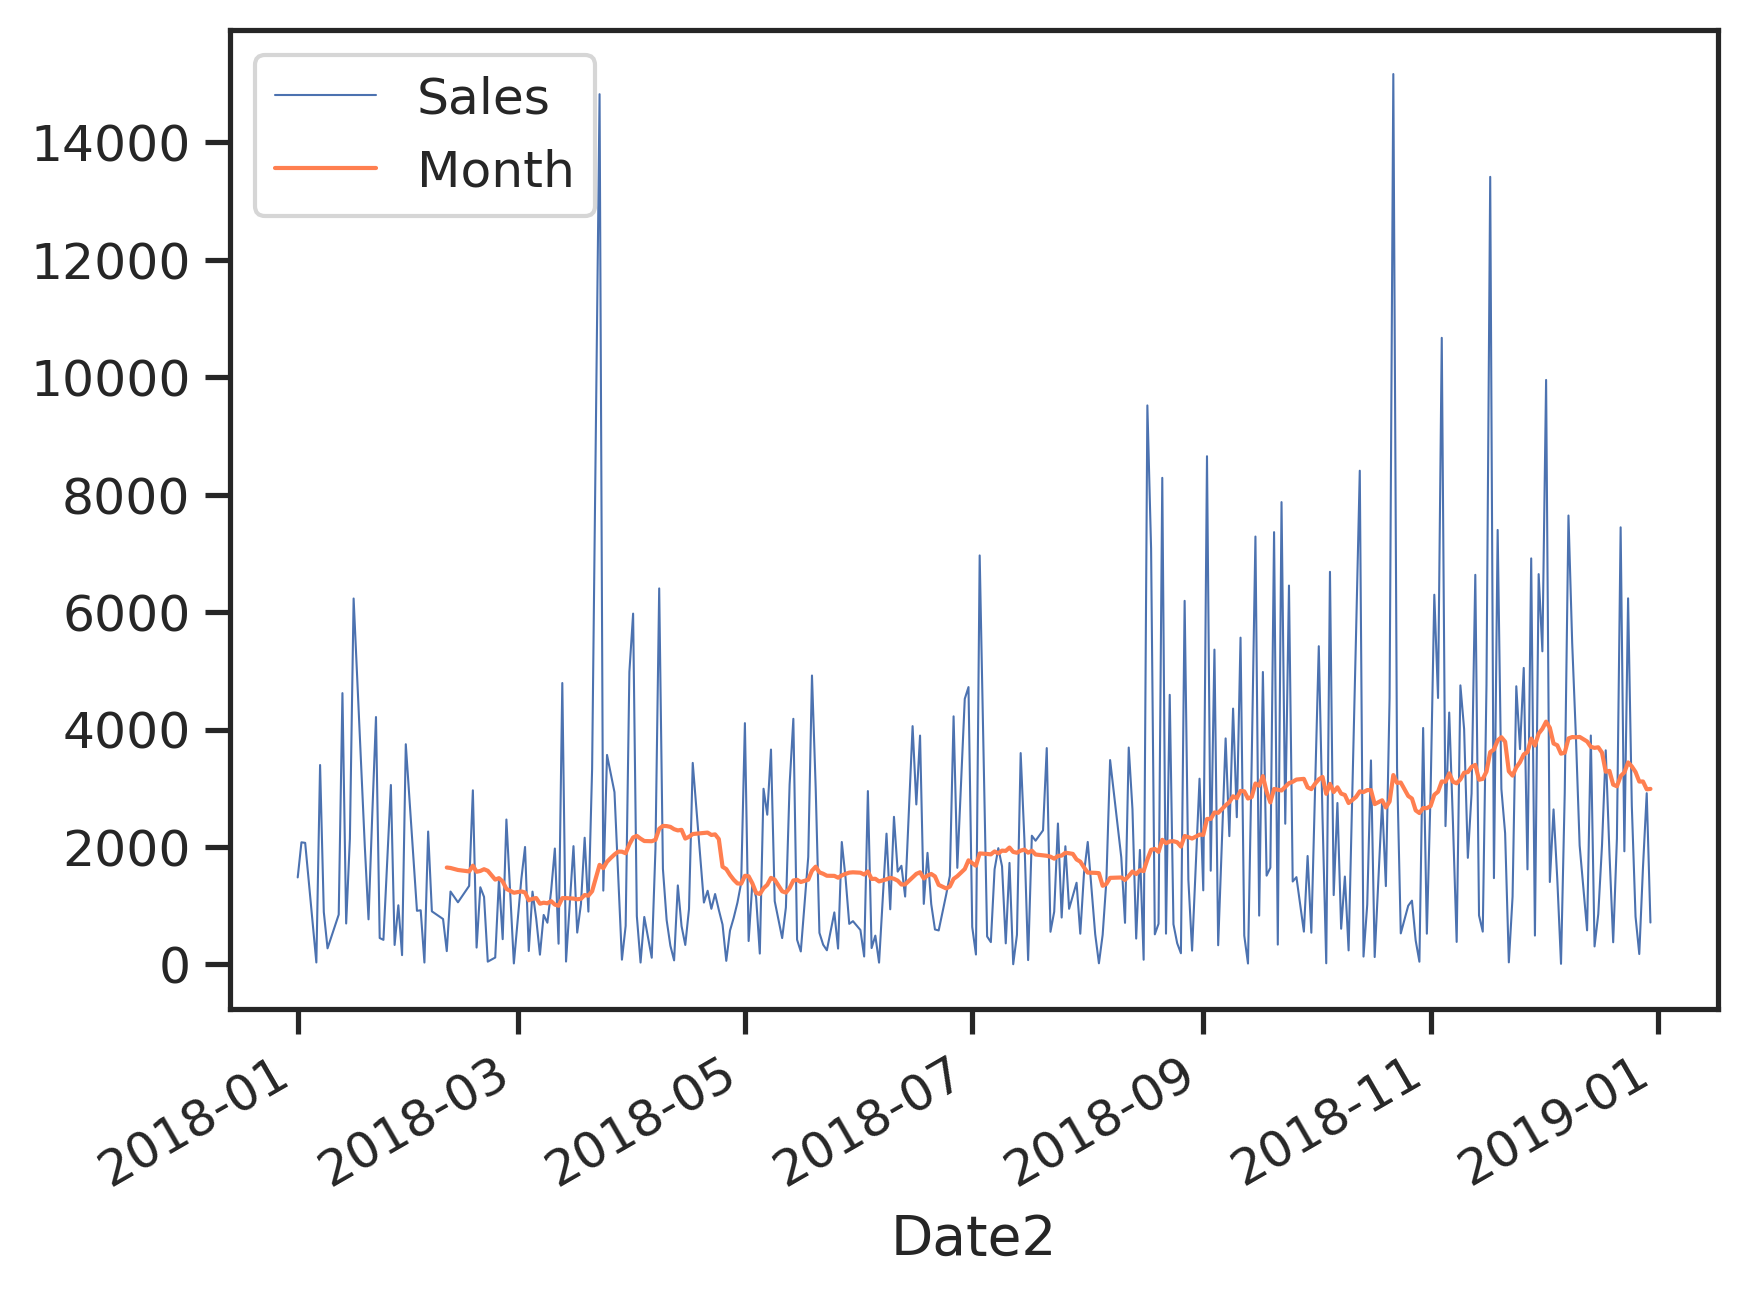

In [56]:
# 30일 이동평균 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

# 선 그래프 시각화
ax = df_line.plot(x='Date2', y='Sales',linewidth = "0.5")
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth = "1", ax=ax)

In [58]:
# 연도 별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

Year        Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192

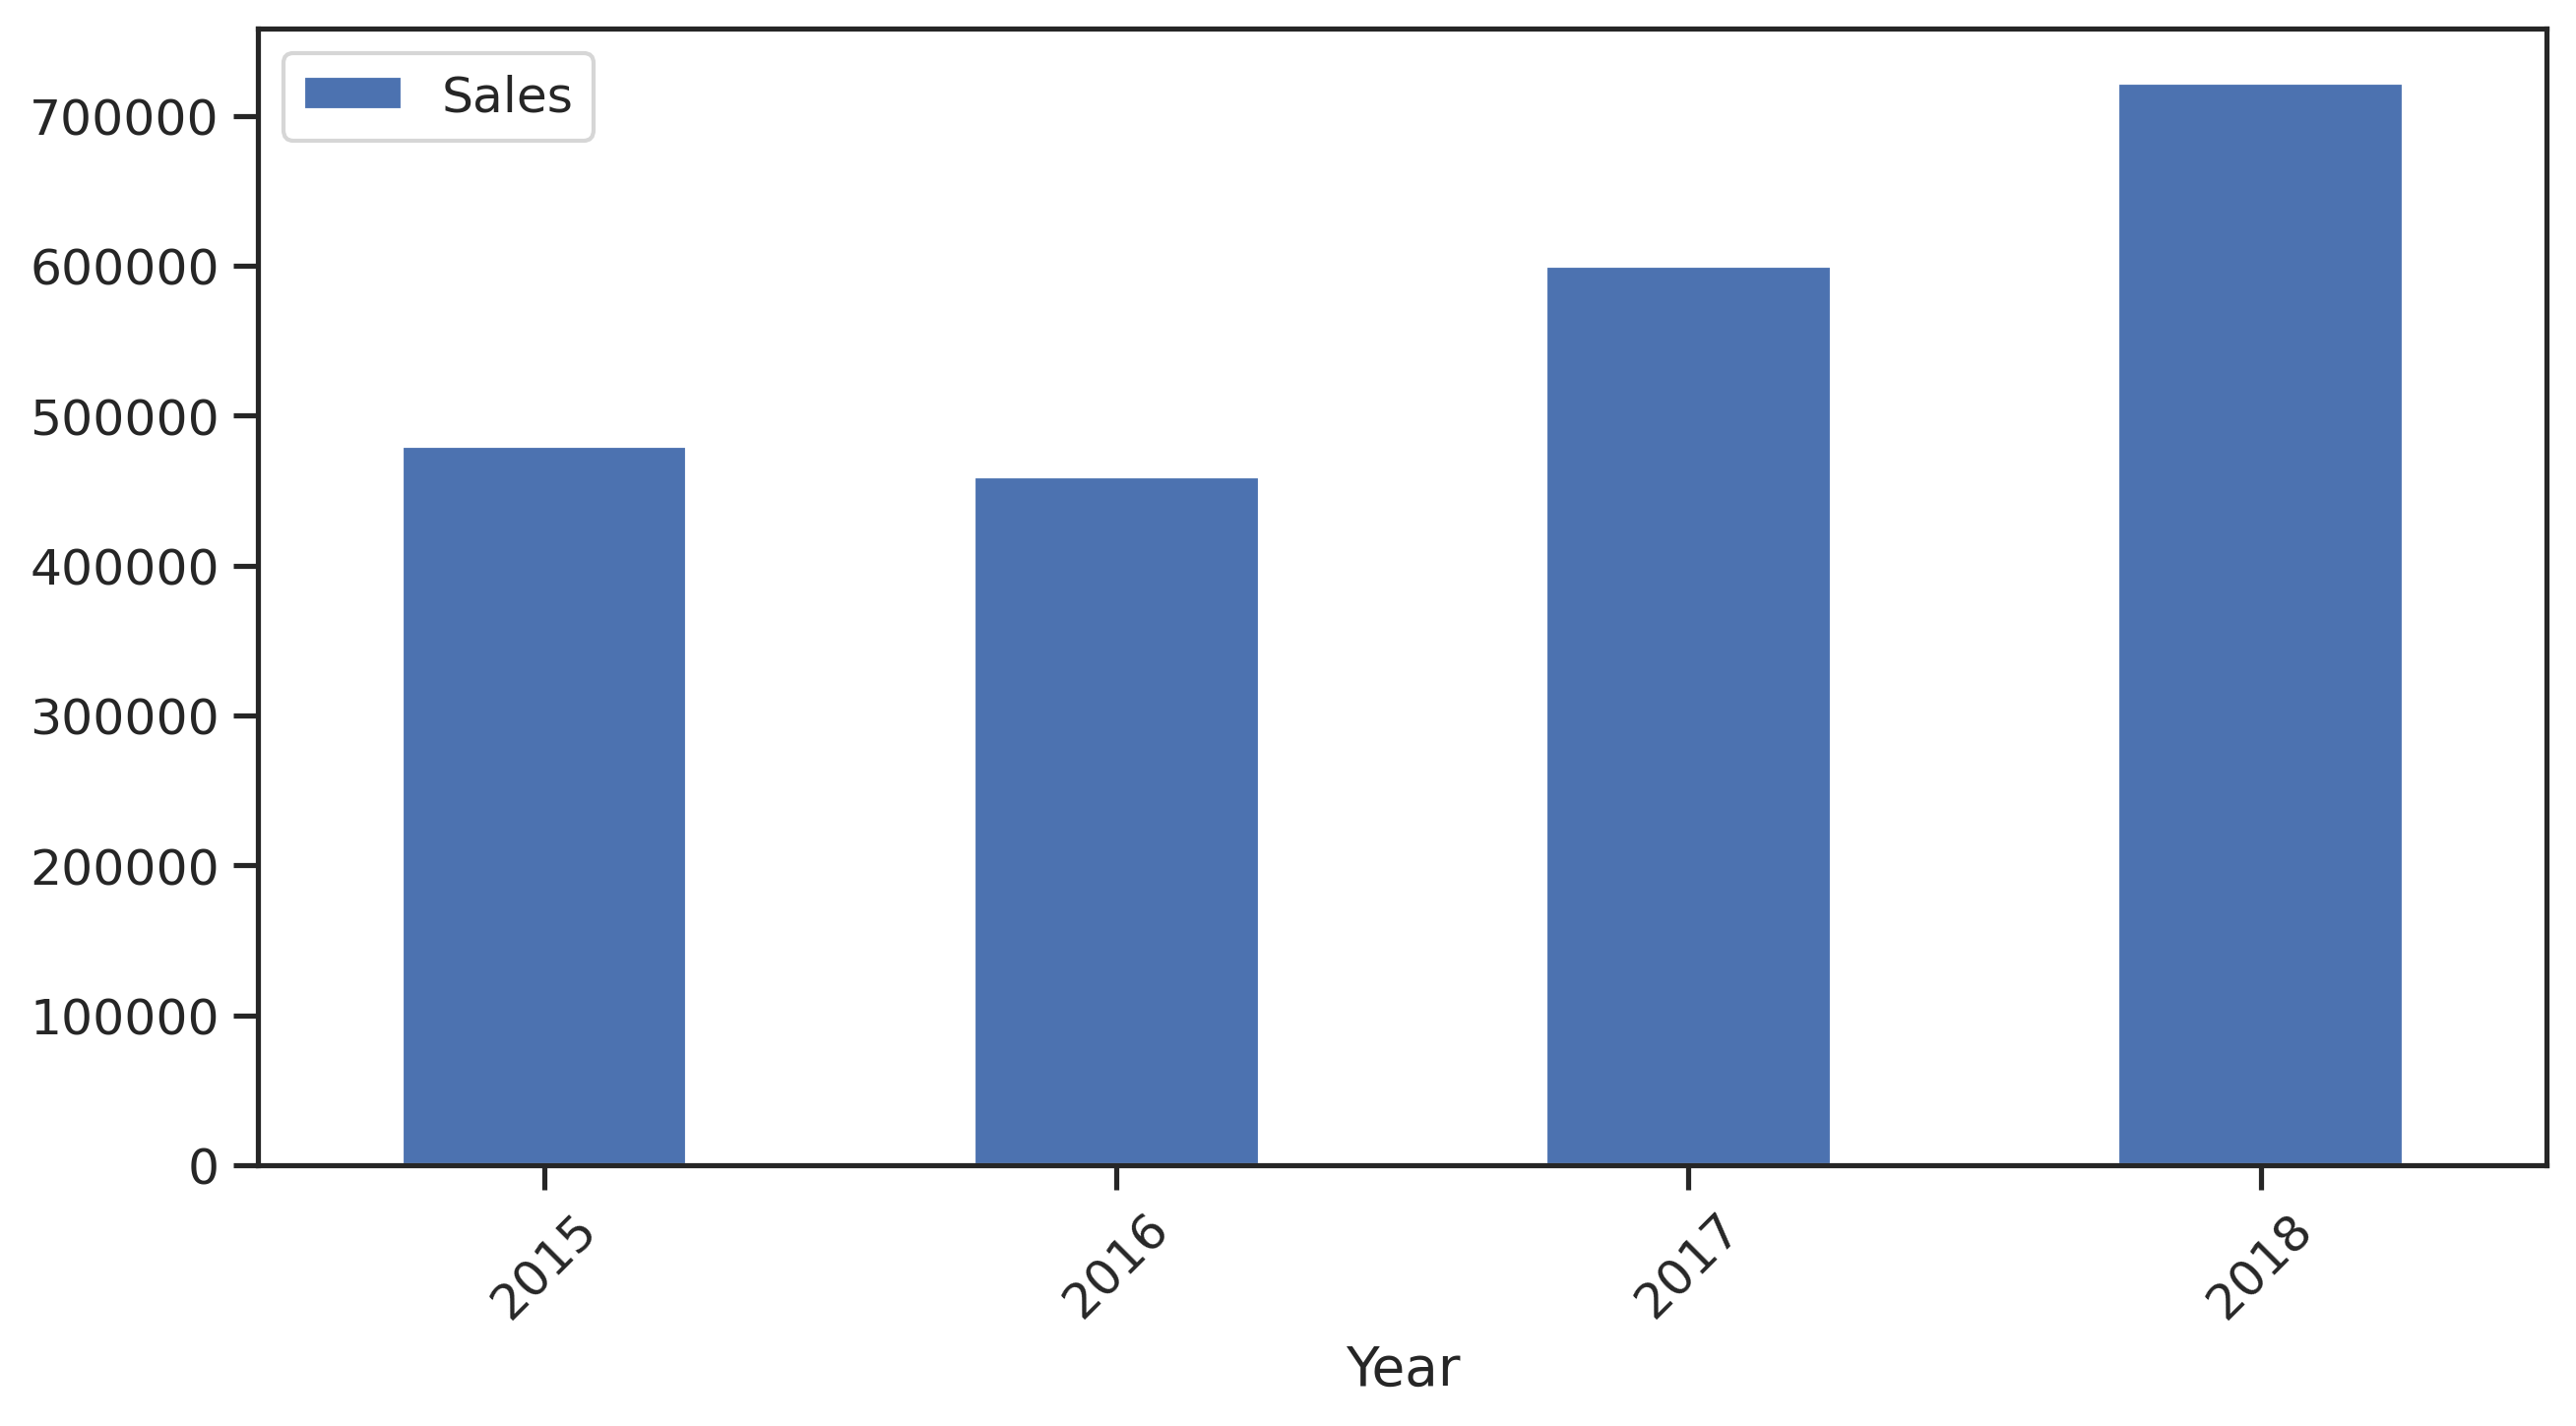

In [63]:
# 연도 별 매출액 막대 그래프 시각화
# rot = 라벨 표시각도 조정
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=45, figsize=(10,5))

In [64]:
df.head(3)

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
7980    7981  CA-2015-103800  03/01/2015  07/01/2015  Standard Class   
741      742  CA-2015-112326  04/01/2015  08/01/2015  Standard Class   
740      741  CA-2015-112326  04/01/2015  08/01/2015  Standard Class   

     Customer ID  Customer Name      Segment        Country        City  \
7980    DP-13000  Darren Powers     Consumer  United States     Houston   
741     PO-19195  Phillina Ober  Home Office  United States  Naperville   
740     PO-19195  Phillina Ober  Home Office  United States  Naperville   

         State  Postal Code   Region       Product ID         Category  \
7980     Texas      77095.0  Central  OFF-PA-10000174  Office Supplies   
741   Illinois      60540.0  Central  OFF-BI-10004094  Office Supplies   
740   Illinois      60540.0  Central  OFF-ST-10002743  Office Supplies   

     Sub-Category                                       Product Name    Sales  \
7980        Paper  Message Book, Wirebound, Four 5 1/2" X 4" Form...   16.448   
741       Binders         GBC Standard Plastic Binding Systems Combs    3.540   
740       Storage                      SAFCO Boltless Steel Shelving  272.736   

          Date2  Year  
7980 2015-01-03  2015  
741  2015-01-04  2015  
740  2015-01-04  2015

In [60]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', 
                             columns='Segment', 
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment  Year     Consumer    Corporate  Home Office
0        2015  262956.8006  127797.4957   89101.9118
1        2016  265356.2933  119675.5989   74404.1132
2        2017  291142.9652  204977.3178  104072.2670
3        2018  328604.4719  236043.6624  157403.8849

<Axes: xlabel='Year'>

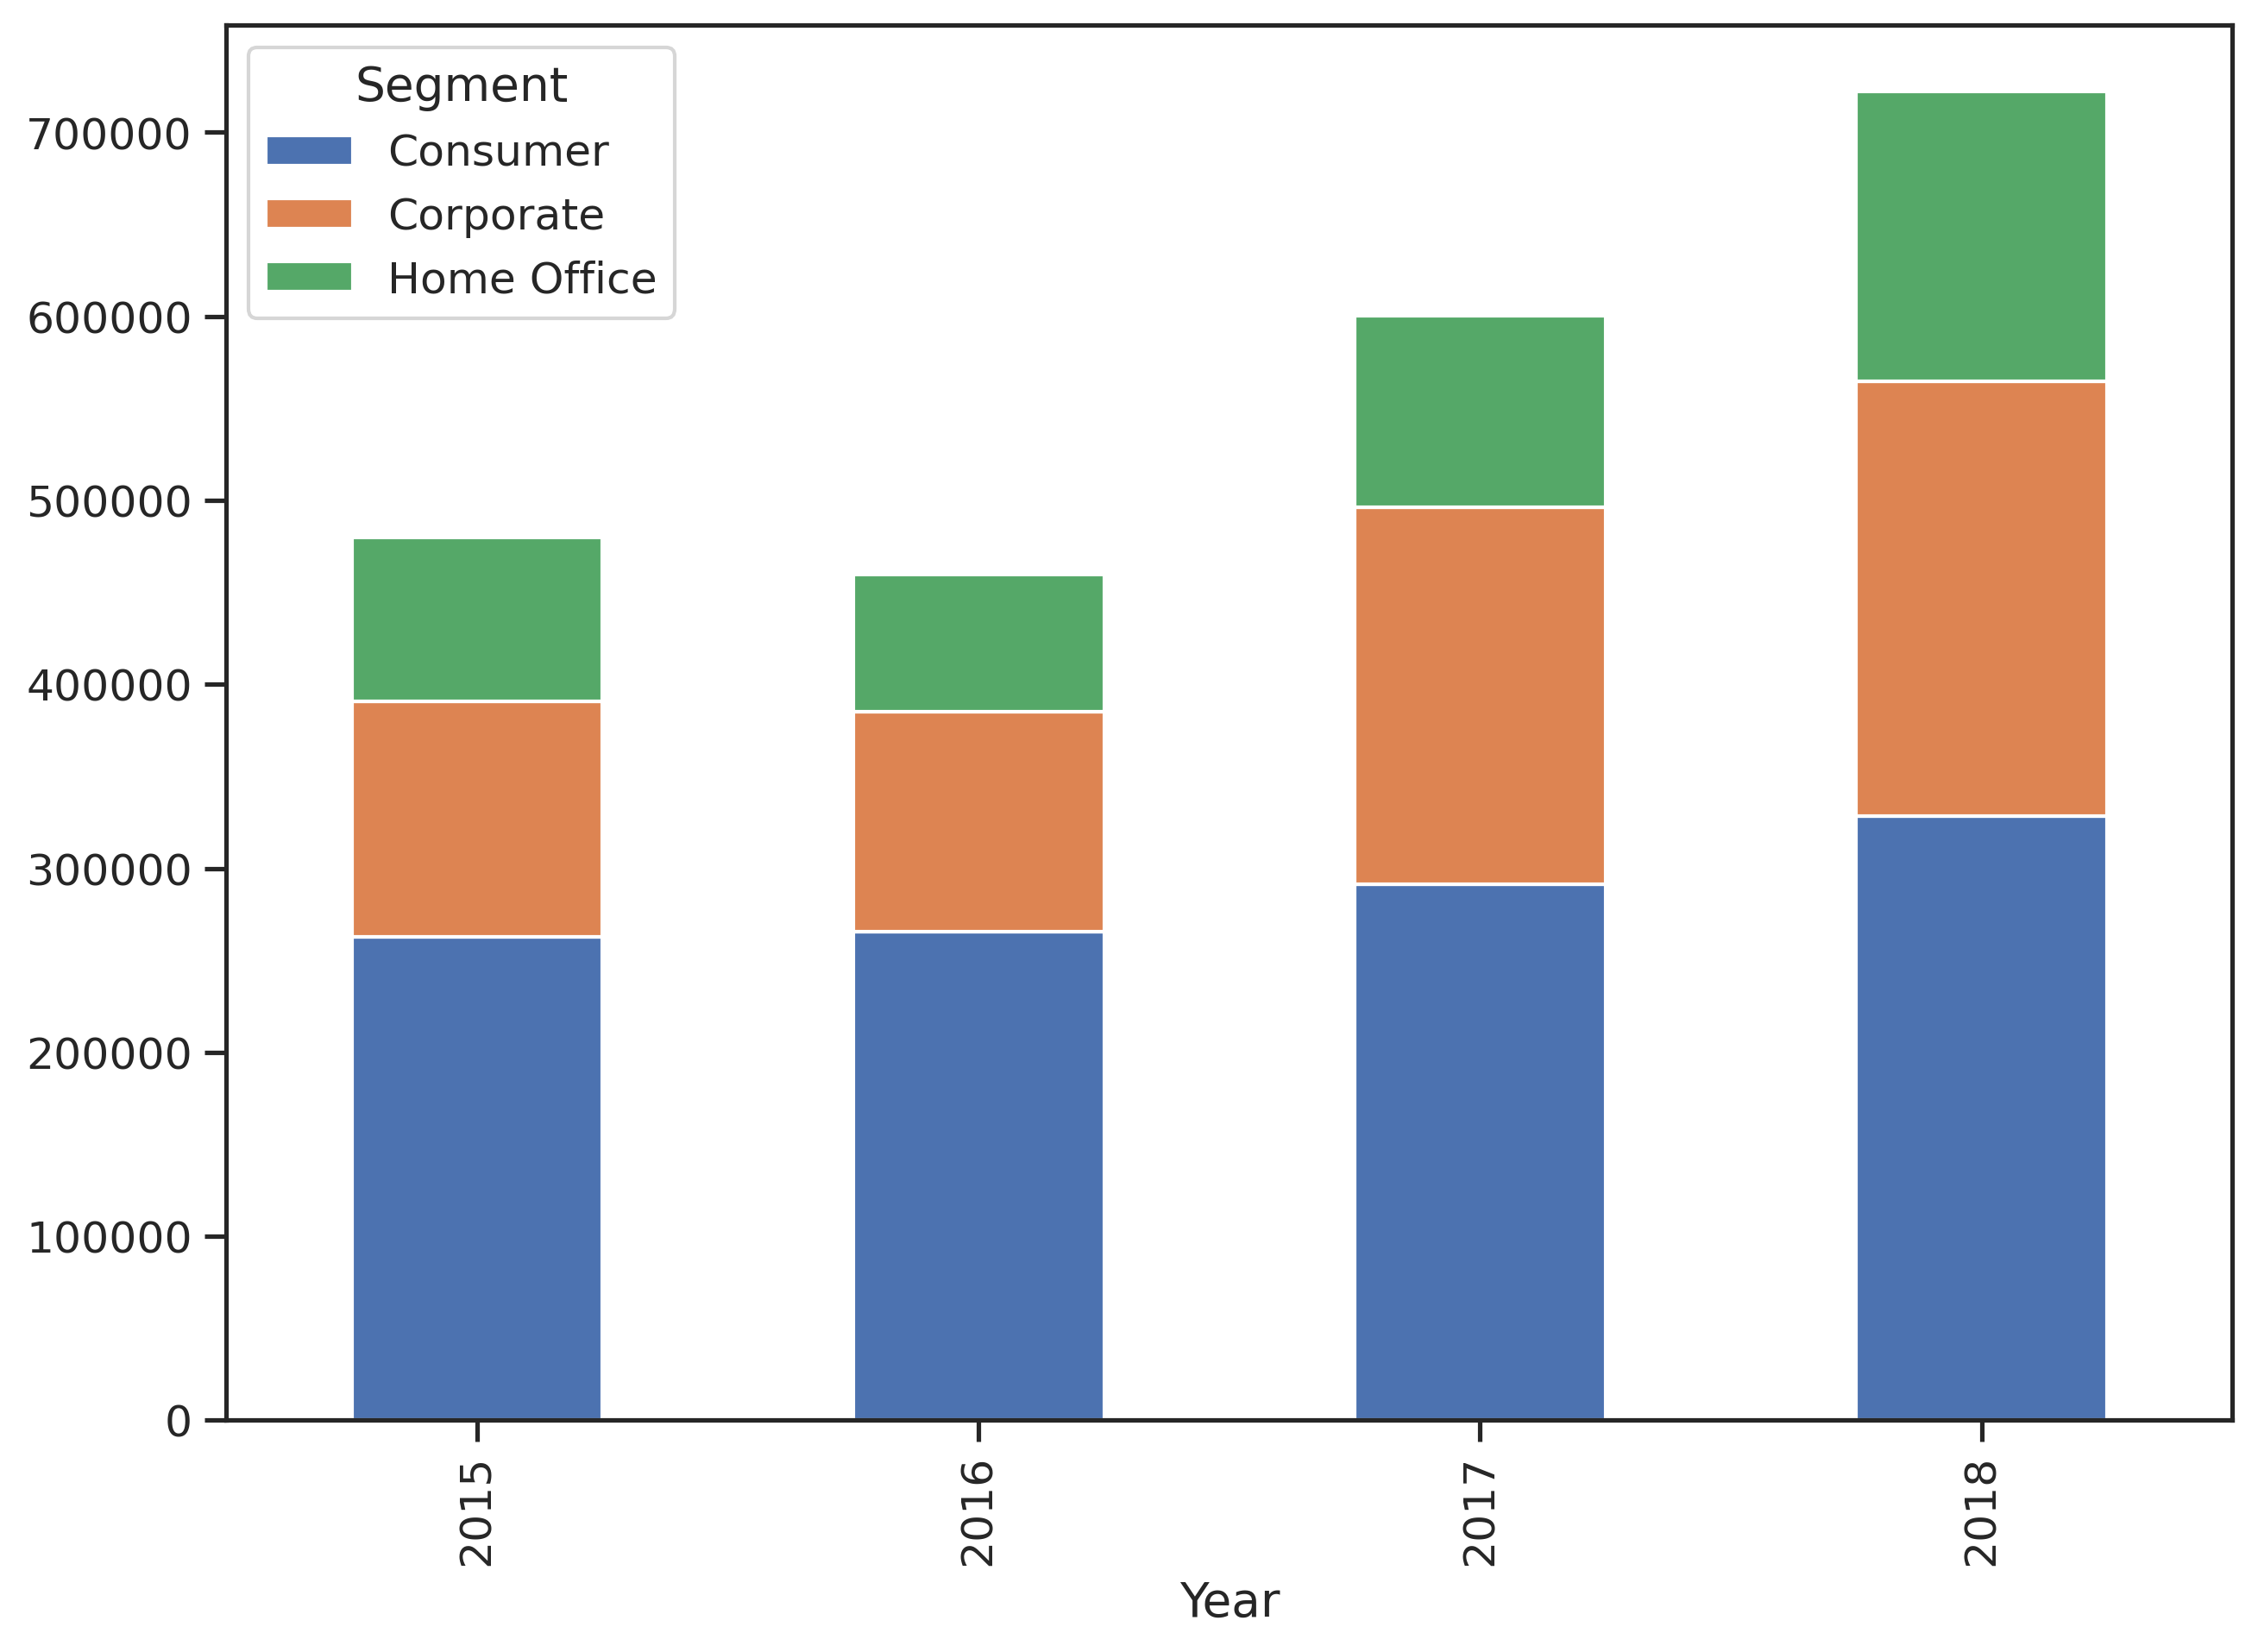

In [66]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))

<Axes: xlabel='Year'>

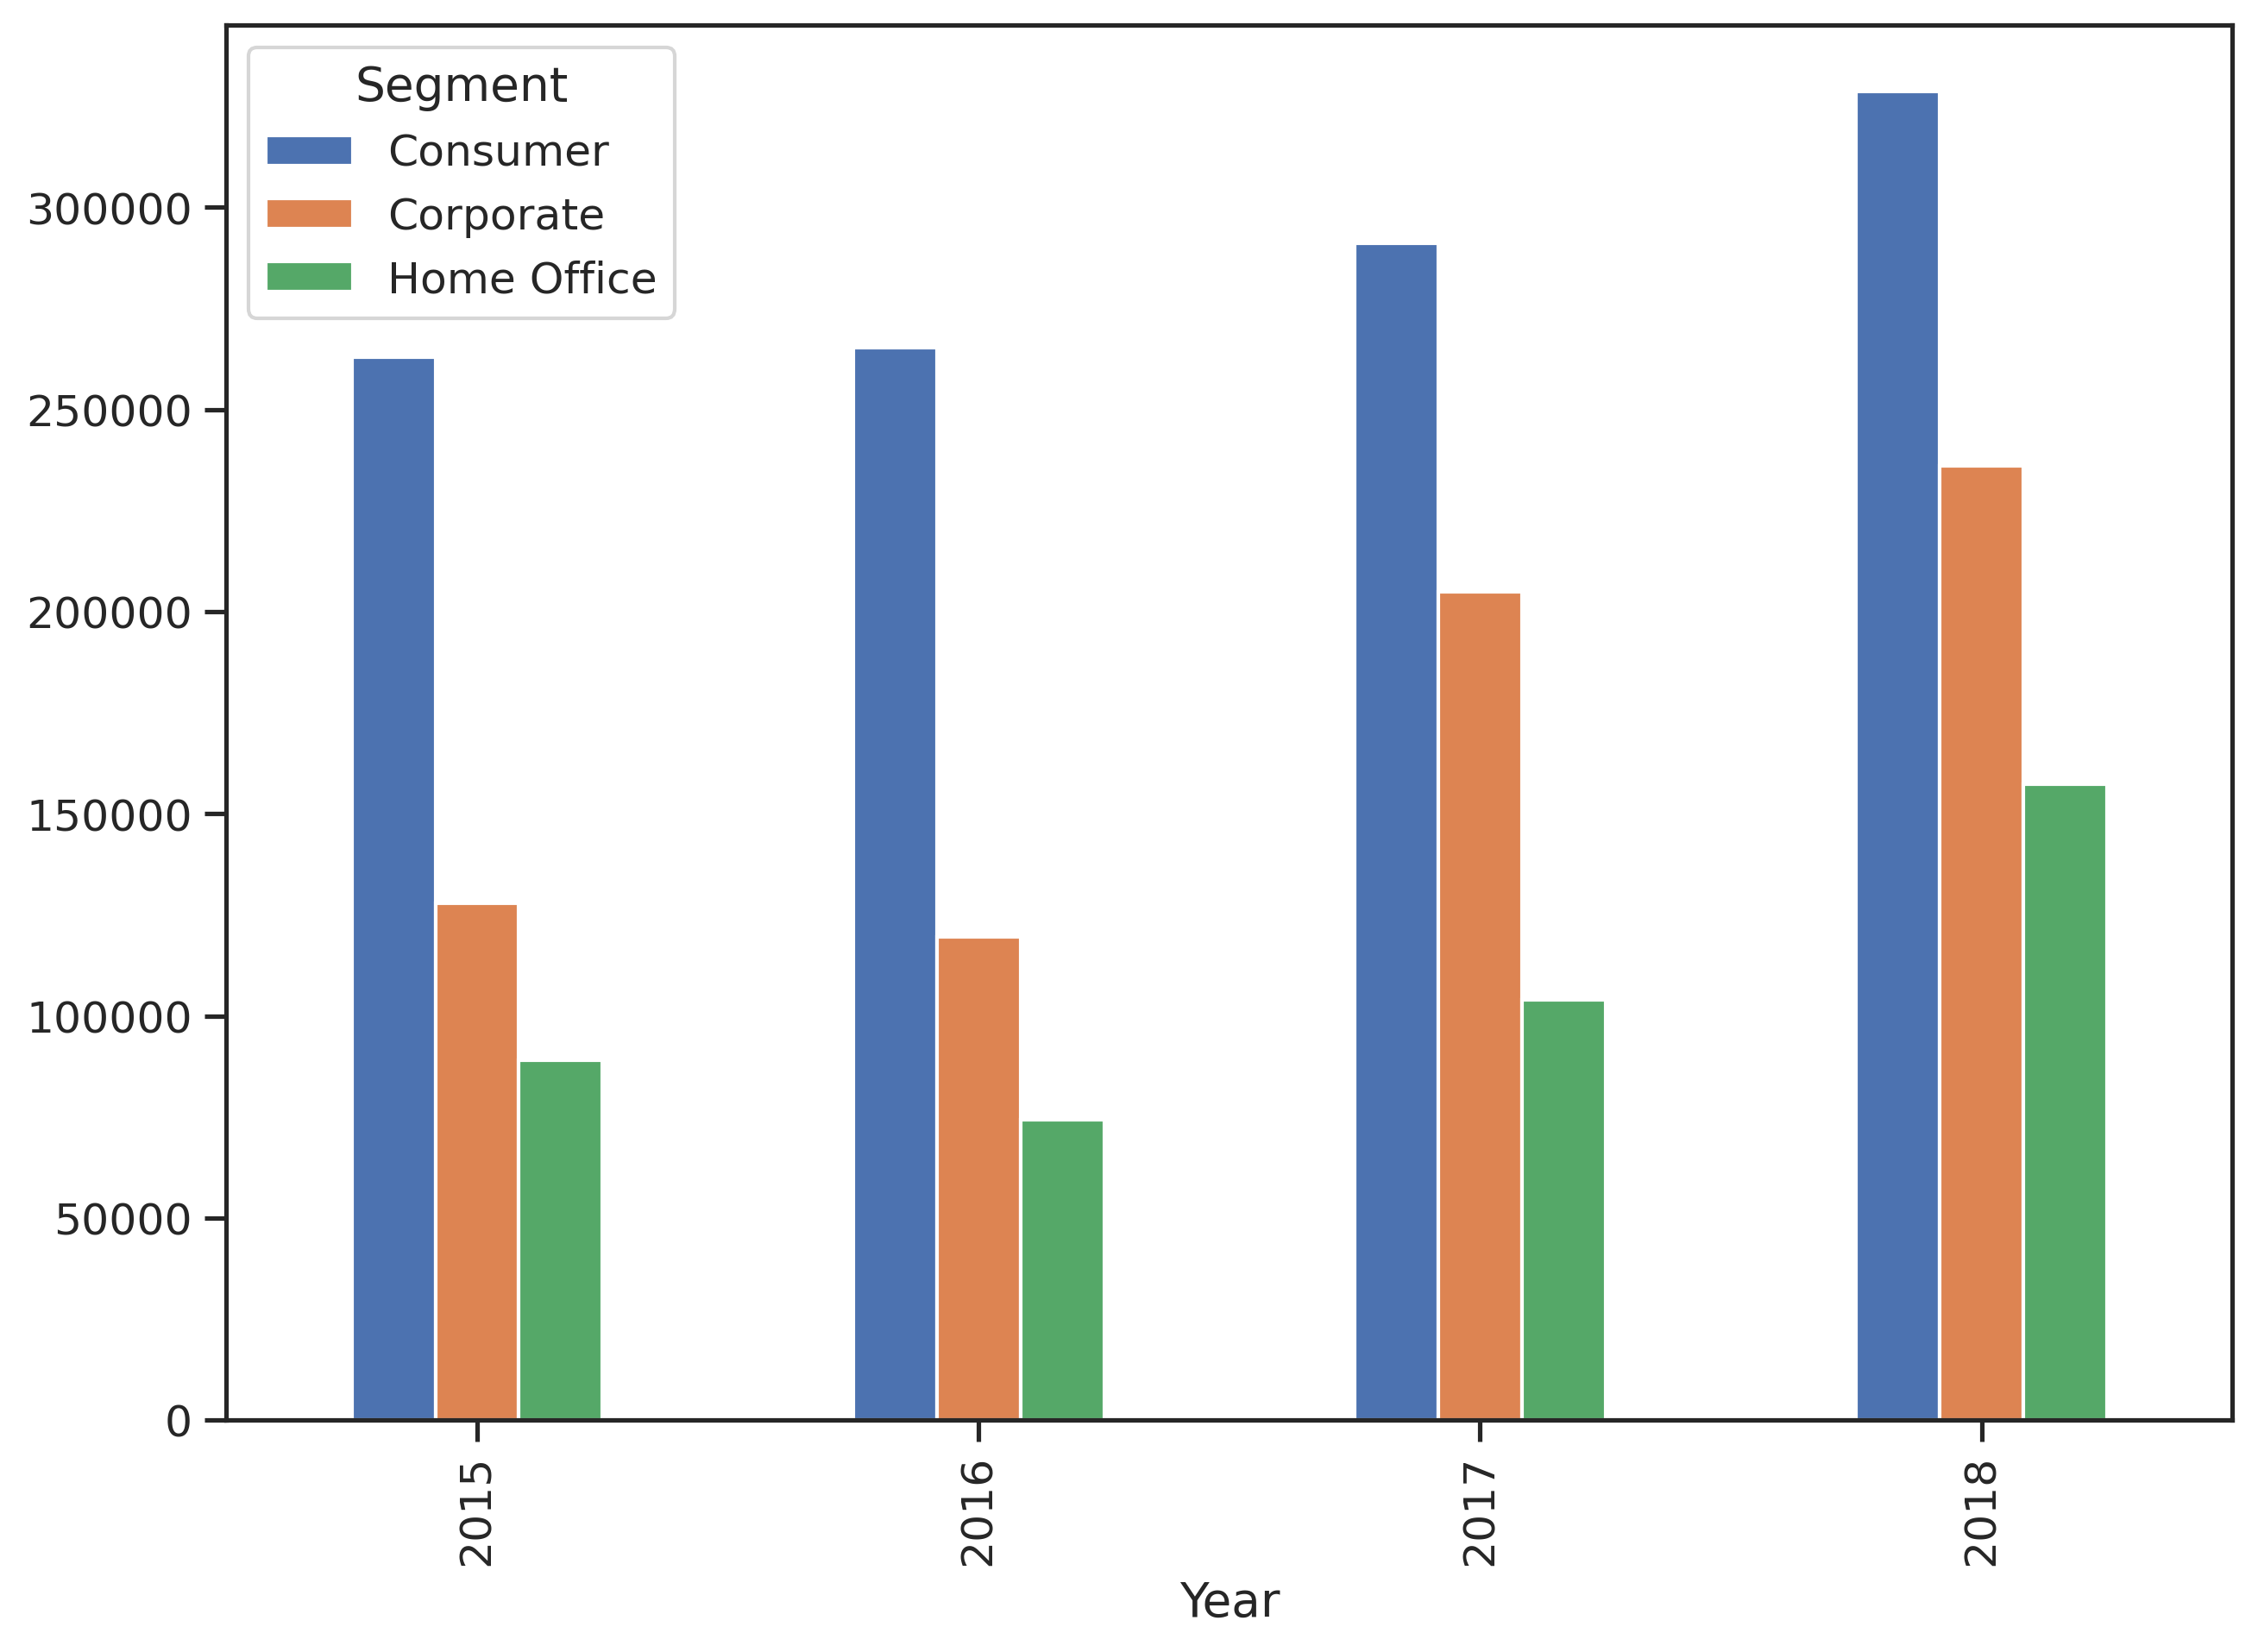

In [68]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=False, figsize=(10,7))

In [82]:
# 밑에있는 데이터로 채워주는 법
# 시계열 데이터 보간
df_line['Month'].fillna(method='bfill', inplace=True)

/tmp/ipykernel_1925/37676953.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_line['Month'].fillna(method='bfill', inplace=True)
/tmp/ipykernel_1925/37676953.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_line['Month'].fillna(method='bfill', inplace=True)


In [84]:
df_line.loc[1,'Sales']=np.nan

In [86]:
df_line.Sales.interpolate()

0      1481.8280
1      1776.0500
2      2070.2720
3        33.7400
4      3395.5900
         ...    
317     814.5940
318     177.6360
319    1657.3508
320    2915.5340
321     713.7900
Name: Sales, Length: 322, dtype: float64

# 박스 플롯

In [120]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.rcParams['figure.dpi'] = 100

In [121]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/karthickveerakumar/startup-logistic-regression
df = pd.read_csv("datasets/50_Startups.csv")

# 데이터 샘플 확인
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

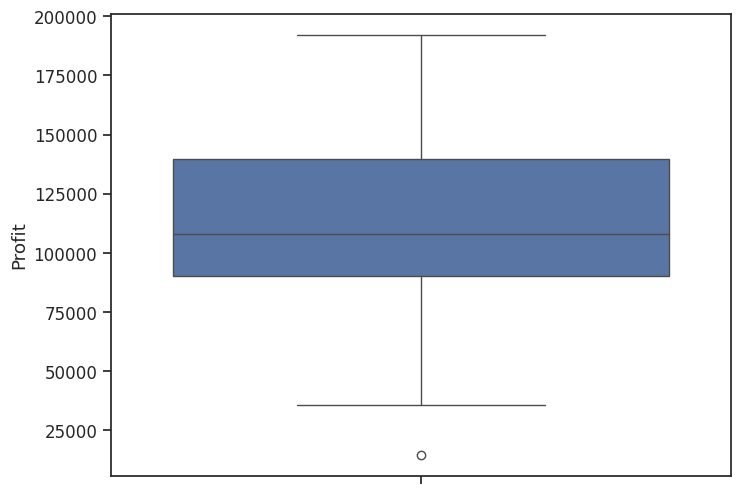

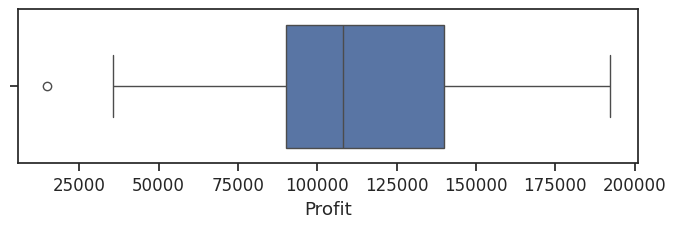

In [122]:
# Profit 변수로 기본 가로 세로 박스 플롯 시각화

# 세로 박스 플롯
plt.figure(figsize = (8, 6))
sns.boxplot(y = 'Profit', data = df)
plt.show()

# 가로 박스 플롯
plt.figure(figsize = (8, 2))
sns.boxplot(x = 'Profit', data = df)
plt.show()

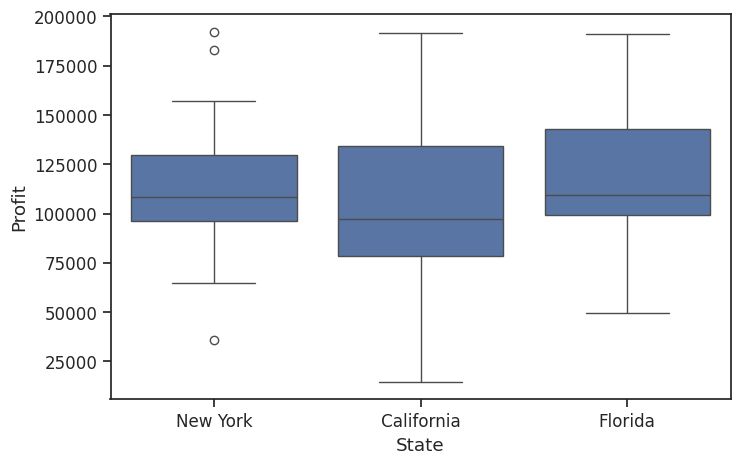

In [123]:
# State 구분에 따른 Profit 박스 플롯 시각화

plt.figure(figsize=(8,5))
sns.boxplot(x="State", y="Profit", data=df)
plt.show()

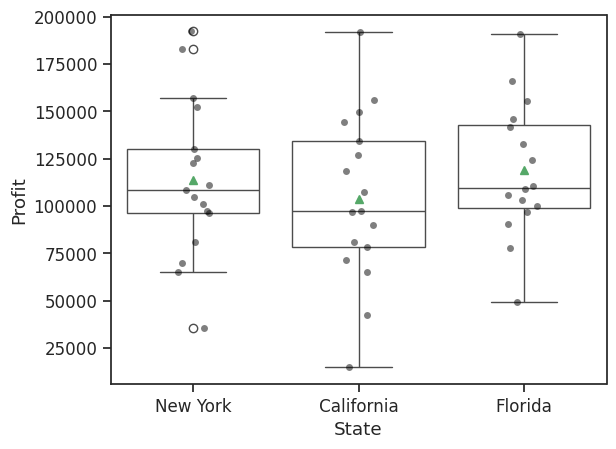

In [124]:
# 평균, 데이터 포인트 포함한 박스 플롯 시각화
sns.boxplot(x="State", y="Profit", 
            showmeans=True, 
            boxprops={'facecolor':'None'}, 
            data=df)

sns.stripplot(x='State', y='Profit', 
              data=df, 
              jitter=True, 
              marker='o', 
              alpha=0.5,
              color='black')

plt.show()

# 분포 시각화

In [125]:
# 필요한 패키지 설치
# !pip install plotly
# !pip install pywaffle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from pywaffle import Waffle
plt.rcParams['figure.dpi'] = 100

In [126]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/six-countries-height-samples
df = pd.read_csv("datasets/six_countries_height_samples.csv")

# 데이터 샘플 확인
df.head()

id    country  sex  height_cm
0  rhop00001  AUSTRALIA  man        189
1  rhop00002  AUSTRALIA  man        165
2  rhop00003  AUSTRALIA  man        189
3  rhop00004  AUSTRALIA  man        164
4  rhop00005  AUSTRALIA  man        192

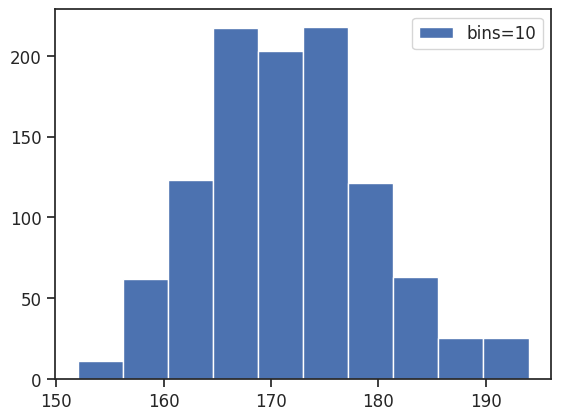

In [127]:
# 기본 히스토그램 시각화

#  신장 컬럼만 필터링
df1 = df[['height_cm']]

# 10cm 단위로 히스토그램 시각화
plt.hist(df1, bins=10, label='bins=10')
plt.legend()
plt.show()

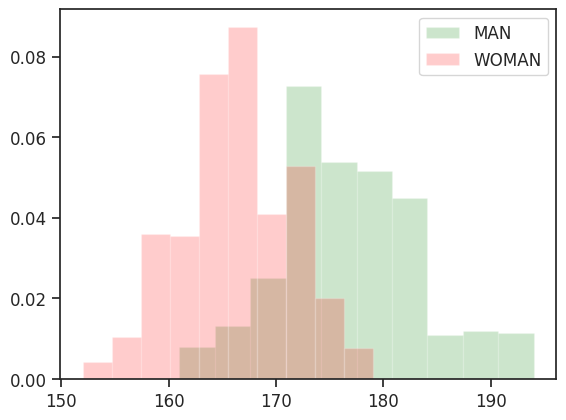

In [128]:
# 남성 여성 히스토그램 시각화

#  남성 여성 별도 데이터셋 생성
df1_1 = df[df['sex'].isin(['man'])]
df1_1 = df1_1[['height_cm']]
df1_2 = df[df['sex'].isin(['woman'])]
df1_2 = df1_2[['height_cm']]

# 10cm 단위로 남성, 여성 신장 히스토그램 시각화
plt.hist(df1_1, color = 'green', alpha = 0.2, bins = 10, label = 'MAN', density = True)
plt.hist(df1_2, color = 'red', alpha = 0.2, bins = 10, label = 'WOMAN', density = True)
plt.legend()
plt.show()

In [129]:
# 파이차트, 도넛차트 시각화를 위한 데이터 전처리

df2 = df[['country','height_cm']]
# 키 175 이상만 추출
df2=df2[df.height_cm >= 175]
df2 = df2.groupby('country').count().reset_index()

df2.head(10)

country  height_cm
0  AUSTRALIA         68
1    DENMARK         59
2      ITALY         67
3      JAPAN         46
4      KOREA         52
5     TURKEY         61

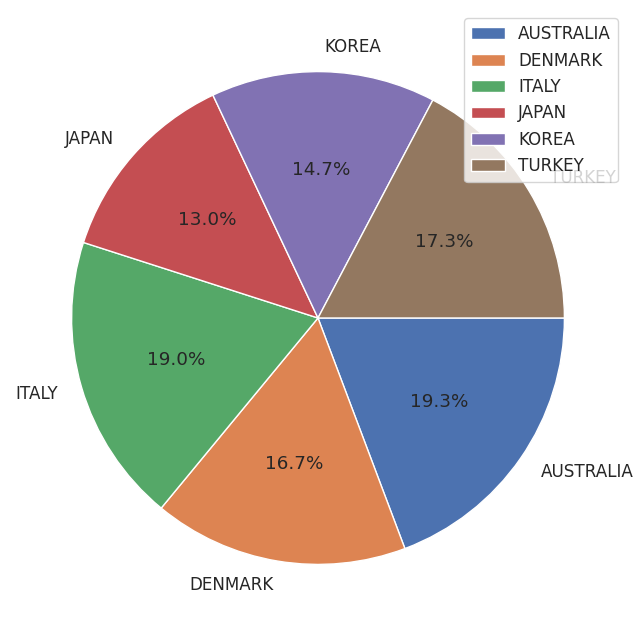

In [130]:
# 파이차트 시각화

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색 설정
ax = fig.add_subplot() # 프레임 생성

# 파이차트 출력
ax.pie(df2.height_cm, 
       labels=df2.country, # 라벨 출력
       startangle=0, # 시작점 degree 설정
       counterclock=False, # 시계 방향
       autopct=lambda p : '{:.1f}%'.format(p) # 퍼센자릿수 설정
       )

plt.legend() # 범례 표시
plt.show()

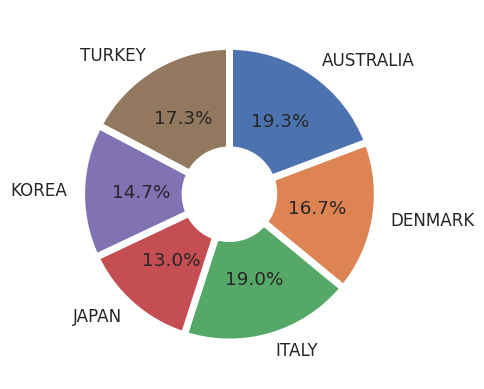

In [117]:
# 도넛차트 시각화

# 차트 형태 옵션 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df2.height_cm, labels=df2.country, autopct='%.1f%%', 
        startangle=90, counterclock=False, wedgeprops=wedgeprops)
plt.show()

In [118]:
# 트리맵 차트용 데이터셋 전처리

df3 = df[['country', 'sex', 'height_cm']]
df3=df3[df.height_cm >= 175]
# 국가, 성별 단위 신장 175cm 이상 카운팅
df3 = df3.groupby(['country','sex']).count().reset_index()

df3.head(10)

country    sex  height_cm
0  AUSTRALIA    man         59
1  AUSTRALIA  woman          9
2    DENMARK    man         53
3    DENMARK  woman          6
4      ITALY    man         60
5      ITALY  woman          7
6      JAPAN    man         45
7      JAPAN  woman          1
8      KOREA    man         50
9      KOREA  woman          2

In [131]:
# 트리맵 차트 시각화

fig = px.treemap(df3,
                 path=['sex','country'],
                 values='height_cm',
                 color='height_cm',
                 color_continuous_scale='viridis')

fig.show()

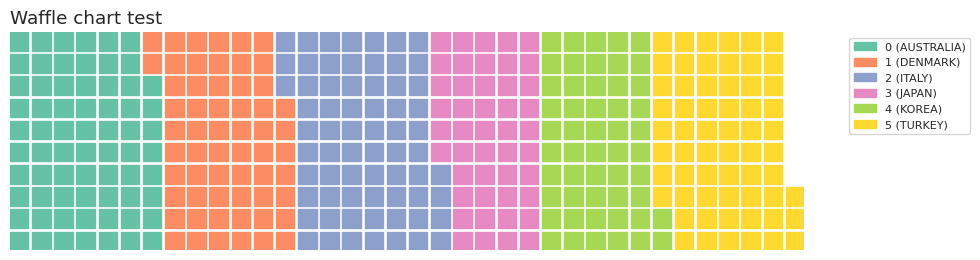

In [132]:
# 와플차트 시각화

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        111: {
            'values': df2['height_cm'],
            'labels': ["{0} ({1})".format(n, v) for n, v in df2['country'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': 'Waffle chart test', 'loc': 'left'}
        }
    },
    rows=10,
    figsize=(10, 10) 
)

# 회귀분석

In [134]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 18.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 16.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [137]:
df = pd.read_csv('./data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


quiz  final_test  sleep_time school_method
0   4.2          67         7.2           bus
1   7.2          71         7.9       bicycle
2   0.0          19         5.3           bus
3   3.0          35         6.8          walk
4   1.5          35         7.5          walk

# 단순회귀모형
* 회귀분석(regression analysis)이란 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
* 이때 원인이 되는 변수를 설명변수(explanatory variable)라 하고, 결과가 되는 변수를 반응변수(response variable)라고 합니다.
* 설명변수와 반응변수를 각각 독립변수(independent variable)와 종속변수(dependent variable)라고 부릅니다.

* 단순회귀모형은 설명변수와 반응변수가 1개씩인 가장 단순한 모델 

In [138]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

* 반응변수 기말고사 점수, 
* 설명변수 쪽지 시험의 평균 점수 
* 단순회귀모형

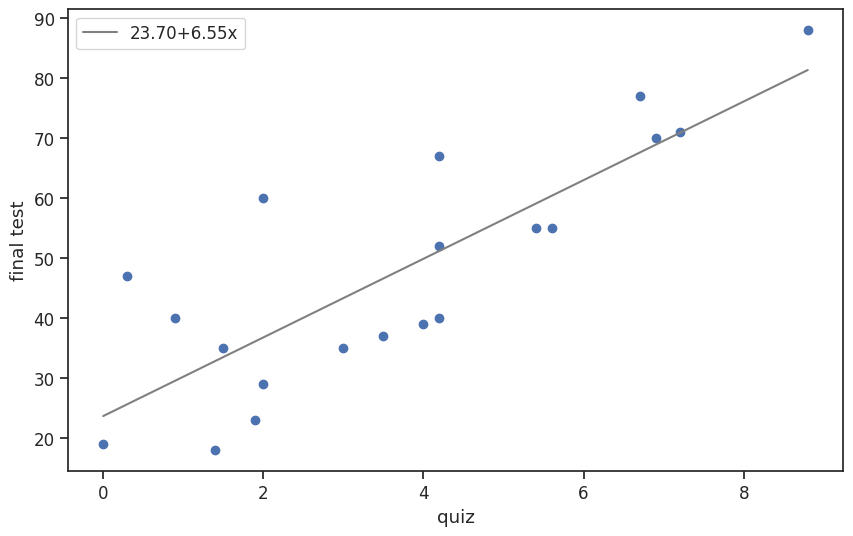

In [139]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

### 회귀분석에서의 가설
* 설명변수 x와 반응변수 y사이에 다음과 같은 관계를 가정 

* 기본적인 관계는 직선상에 있다고 생각하고, 다른 요인에 관해서는 예측할 수 없는 확률적인 것이라고 생각하겠습니다. 
* 이 예측할 수 없는 부분을 오차항(error term)이라고 하고 ${\varepsilon_i}$로 나타내면, 기말고사 결과 ${Y_i}$는 다음과 같이 작성할 수 있습니다. 

* 추가로 회귀분석에서는 다음의 두 가지를 가정합니다.

* 위의 식이 회귀직선(regression line)이라고 부르는 것으로, 그 계수 ${\widehat\beta_0}$과 ${\widehat\beta_1}$을 회귀계수(regression coefficient)라고 합니다.

### statsmodels에 의한 회귀분석
* smf.ols라는 함수에 설명변수와 반응변수의 관계를 나타낸 문자열과 DataFrame을 전달하고, 추가로 fit메서드를 호출하여 실행할 수 있습니다. .

In [141]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.59e-06
Time:                        12:19:26   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 수업

In [143]:
import pandas as pd

In [145]:
order = pd.read_csv("./instacart_dataset/orders.csv")

In [146]:
order.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2352815   185282    prior             5          2                  9   
1   1414622    41949    prior             9          0                 16   
2   2534064    24631    prior            66          1                 13   
3    338572    95289    prior             4          2                 14   
4   2578618   170417    prior             5          1                 13   

   days_since_prior_order  
0                       6  
1                       6  
2                       4  
3                      18  
4                      14

In [148]:
# 시간별 주문 건수
order.groupby(['order_hour_of_day'])[['order_id']].count()

order_id
order_hour_of_day          
0                        21
1                        12
2                         3
3                         7
4                         2
5                         4
6                        33
7                        95
8                       163
9                       239
10                      277
11                      242
12                      271
13                      291
14                      266
15                      250
16                      254
17                      220
18                      170
19                      135
20                      102
21                       63
22                       54
23                       46

In [154]:
order[order.user_id == 185282]

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2352815   185282    prior             5          2                  9   

   days_since_prior_order  
0                       6

In [169]:
# 첫구매후 다음 구매까지 걸린 편균 일수
order[order.order_number == 2]['days_since_prior_order'].mean()

13.652

In [165]:
# order.days_since_prior_order.mean()
order.describe()

order_id        user_id  order_number    order_dow  \
count  3.220000e+03    3220.000000   3220.000000  3220.000000   
mean   1.734747e+06  102670.522981     18.308696     2.761491   
std    9.980085e+05   59659.771341     17.849124     2.044612   
min    2.581000e+03      15.000000      2.000000     0.000000   
25%    8.503358e+05   50536.000000      5.000000     1.000000   
50%    1.748199e+06  102933.000000     12.000000     3.000000   
75%    2.634538e+06  153621.000000     25.000000     5.000000   
max    3.420098e+06  206206.000000     99.000000     6.000000   

       order_hour_of_day  days_since_prior_order  
count        3220.000000             3220.000000  
mean           13.467081               10.851242  
std             4.204670                8.999564  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000                7.000000  
75%            16.000000               15.000000  
max            23.000000               30.000000

In [171]:
import sqlalchemy
from urllib import parse

user = 'swp'
password = 'swp1'
host='172.26.229.230'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [184]:
order_products__prior = pd.read_sql_query("select * from order_products__prior;", con=engine)

In [183]:
# 주문 건당 평균 구매 상품 수
order_products__prior.product_id.sum() / order_products__prior.product_id.count()

25529.675

In [182]:
product = pd.read_

order_id  product_id  add_to_cart_order  reordered
0          2581       40174                  1          0
1          2581       17461                  2          0
2          2581       19731                  3          1
3          5880       24838                  1          1
4          5880       24852                  2          1
...         ...         ...                ...        ...
32285   3420098       46676                  9          0
32286   3420098        5240                 10          0
32287   3420098       23375                 11          0
32288   3420098       42342                 12          0
32289   3420098       17706                 13          1

[32290 rows x 4 columns]

In [187]:
# 상품별 재구매율 계산, 1~10위, 상품명
products = pd.read_sql_query("select * from products;", con=engine)

In [190]:
pd.concat([order_products__prior.groupby(['product_id'])['reordered'].sum() /
    order_products__prior.groupby(['product_id'])['reordered'].count(), 
    products.set_index("product_id")['product_name'] ] , axis=1).sort_values(by=['reordered'], ascending=False)

reordered                                       product_name
product_id                                                              
47                1.0         Onion Flavor Organic Roasted Seaweed Snack
40                1.0  Beef Hot Links Beef Smoked Sausage With Chile ...
49682             1.0                                 California Limeade
49680             1.0                 All Natural Creamy Caesar Dressing
49678             1.0                    Large Chicken & Cheese Taquitos
...               ...                                                ...
9473              0.0               Cabernet Sauvignon, California, 2011
9497              0.0  Smoothie Fruits Squished The Purple One Over 6...
9511              0.0              Small Breed Grain-Free Adult Dog Food
9537              0.0                                            Arugula
9587              0.0           Organic Shiitake & Vegetable Potstickers

[9288 rows x 2 columns]

In [ ]:
# pd.concat([order_products__prior.groupby(['product_id'])['reordered'].sum() /
#     order_products__prior.groupby(['product_id'])['reordered'].count(), 
#     products.set_index("product_id")['product_name'] ] , axis=1).sort_values(by=['reordered'], ascending=False)

order_products__prior.froupby(['product_id'])['reordered'].agg()

# 3-2_20230327

## k-최근접 이웃의 한계

In [191]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [198]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 35.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [199]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [200]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [201]:
print(knr.predict([[50]]))

[1033.333]


In [202]:
import matplotlib.pyplot as plt

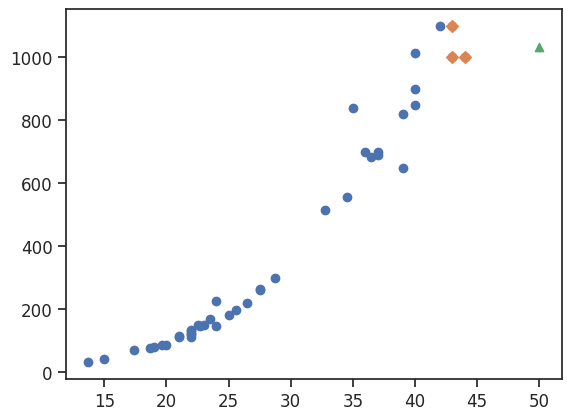

In [203]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [204]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [205]:
print(knr.predict([[100]]))

[1033.333]


In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [208]:
# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.839]


In [209]:
print(lr.coef_, lr.intercept_)

[39.017] -709.0186449535477


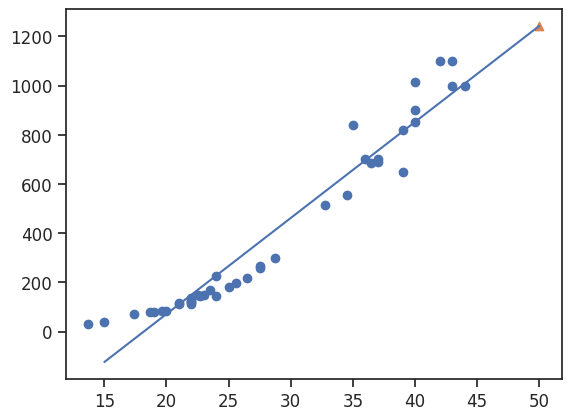

In [210]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

In [211]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
y = perch_weight
X = perch_length
X = sm.add_constant(X)

In [214]:
X[:3]

array([[ 1. ,  8.4],
       [ 1. , 13.7],
       [ 1. , 15. ]])

In [215]:
linear_regression = sm.OLS(y, X)

In [216]:
fitted_model = linear_regression.fit()

In [217]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     612.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.78e-31
Time:                        16:31:25   Log-Likelihood:                -336.24
No. Observations:                  56   AIC:                             676.5
Df Residuals:                      54   BIC:                             680.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -648.0776     43.705    -14.828      0.000    -735.702    -560.454
x1            36.9384      1.492     24.756      0.000      33.947      39.930
==============================================================================
Omnibus:                       14.223   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.705
Skew:                           1.101   Prob(JB):                     0.000389
Kurtosis:                       4.373   Cond. No.                         96.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""